In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mpm
from scipy.optimize import curve_fit
from astropy import units as u
from astropy import constants as const
import matplotlib as mpl
from jupyterthemes import jtplot #These two lines can be skipped if you are not using jupyter themes
jtplot.reset()
import time
start_total = time.time()

In [2]:
import os
my_path = '/home/tomi/Documentos/Fisica/Tesis/escrito-tesis/images/'

In [3]:
r0 = 10.0*u.kpc
z0 = 1.*u.kpc
#n0 = 40./(u.cm)**(3)
n0 = 300./(u.cm)**(3)
Dl = 705.4019455128785*u.Mpc
Ds = 1760.3796178766652*u.Mpc
Dls = 1375.6149203241862*u.Mpc

In [4]:
theta_0 = (r0/Dl).decompose()*u.rad.to('arcsec', equivalencies=u.dimensionless_angles()) 
print('Angular scale radius (theta_0 = r0/Dl): ',theta_0, 'arcsec')

Angular scale radius (theta_0 = r0/Dl):  2.9240748137875747 arcsec


## Primero chequeemos el integrador

### Integral del paper con plasma esferico haciendo cambio de variable

In [5]:
def Ne(theta,n0,R0):

    integ = lambda z_tilde: mpm.exp(-np.sqrt(theta**2/theta_0.value**2+z_tilde**2))
    
    upper_limit_0 = (Dls/R0).decompose().value
    lower_limit_0 = 0.0
    integ_0 = mpm.quad(integ,[lower_limit_0,upper_limit_0])
    print('integ_0 =', integ_0)
    
    upper_limit_1 = 0.0
    lower_limit_1 = -(Dl/R0).decompose().value
    integ_1 = mpm.quad(integ,[lower_limit_1,upper_limit_1])
    print('integ_1 =', integ_1)
    
    return (n0*R0).decompose().to(u.cm**(-2))*(integ_0+integ_1)

In [6]:
Ne_test = Ne(1,n0,r0)
print('Ne', Ne_test)

integ_0 = 0.899138816150974
integ_1 = 0.899138816150977
Ne 1.66467149258745e+25 1 / cm2


### Integral del paper con plasma esférico sin hacer cambio de variable

In [7]:
def Ne(theta,n0,r0):
    
    integ = lambda z_tilde: mpm.exp(-np.sqrt(theta**2*Dl.decompose().value**2+z_tilde**2)/r0)
    
    upper_limit_0 = Dls.decompose().value
    lower_limit_0 = 0.0
    integ_0 = mpm.quad(integ,[lower_limit_0,upper_limit_0])
    print('integ_0 =', integ_0)

    upper_limit_1 = 0.0
    lower_limit_1 = -Dl.decompose().value
    integ_1 = mpm.quad(integ,[lower_limit_1,upper_limit_1])
    print('integ_1 =', integ_1)
    
    return ((n0*(integ_0+integ_1))*u.m**(-2)).to(u.cm**(-2))

In [8]:
Ne_test = Ne(1*u.arcsec.to('rad'), n0.decompose().value, r0.decompose().value)
print('Ne', Ne_test)

integ_0 = 2.77445248764575e+20
integ_1 = 2.77445248764576e+20
Ne 1.6646714925874513e+25 1 / cm2


### Rotated Galaxy

The gaussian edge-wise plasma profile has the form
$$
n(r,z) = n_{0}e^{-(\frac{r}{r_{0}})^2} e^{-(\frac{z}{z_0})^{2}} \\
r^2 = x^{2} + y^{2} .
$$

The x direction is the line of sight. Rotating this distribution through the z-direction does nothing, and through the x-direction amounts to rotate the source position and the orientation of sight. We the rotate it through the y-direction. 

<div>
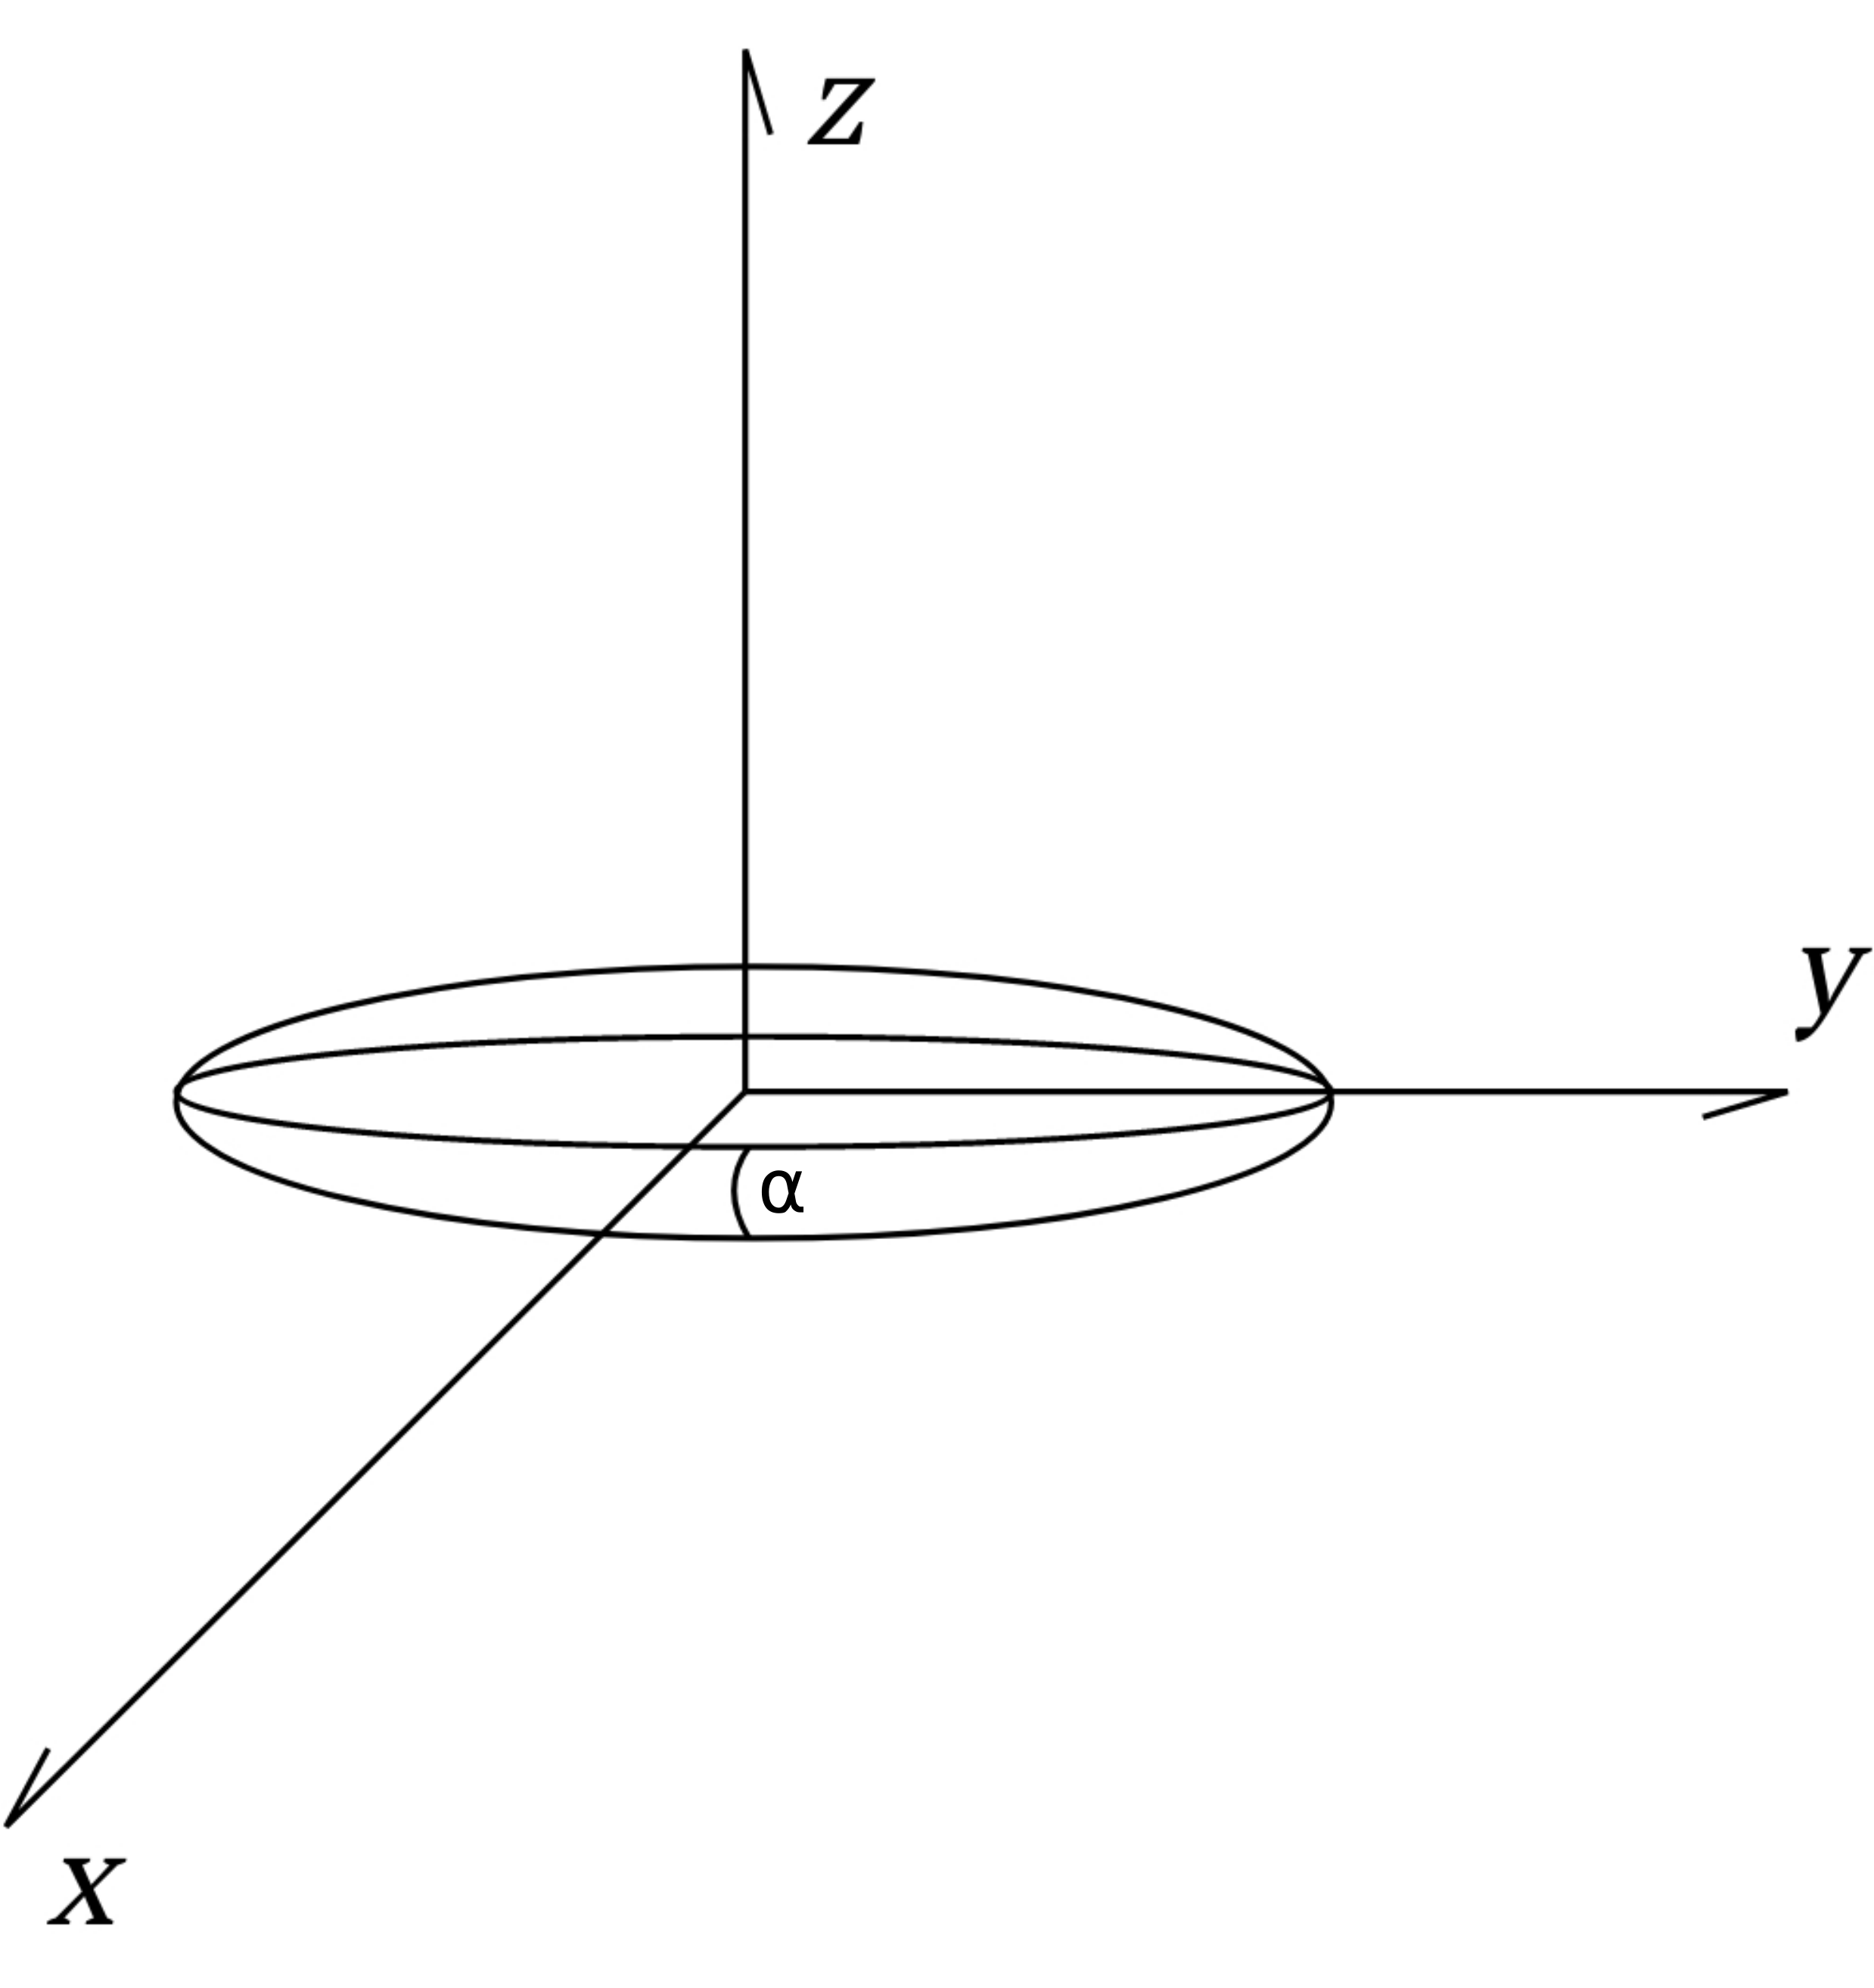
</div>
Me make

$$
z' = zcos\alpha - xsin\alpha \\
x' = zsin\alpha + xcos\alpha \\
z'^{2} = z^{2}cos^{2}\alpha + x^{2}sin^{2}\alpha - 2xzcos\alpha sin\alpha \\
x'^{2} = z^{2}sin^{2}\alpha + x^{2}cos^{2}\alpha + 2xzcos\alpha sin\alpha \\
n_{\alpha}(x,y,z) = n(x',y,z') = n_{0} exp( -\frac{z^{2}sin^{2}\alpha + x^{2}cos^{2}\alpha + 2xzcos\alpha sin\alpha + y^{2}}{r_0^2} ) exp( -(\frac{zcos\alpha}{z_{0}})^{2} ) exp( -(\frac{xsin\alpha}{z_{0}})^{2} ) exp (\frac{2xzcos\alpha sin\alpha}{z_{0}^{2}})
$$


In [9]:
def Ne(y,z,n0,r0,z0,alpha,Dl,Dls):

    integ = lambda x: mpm.exp( -( z**2*mpm.sin(alpha)**2 + x**2*mpm.cos(alpha)**2 +
                                                     2*x*z*mpm.cos(alpha)*mpm.sin(alpha) + y**2)/r0**2 )  * mpm.exp( -(z*mpm.cos(alpha)/z0)**2 ) \
                                                     *mpm.exp( -(x*mpm.sin(alpha)/z0)**2 ) *mpm.exp(2*x*z*mpm.cos(alpha)*mpm.sin(alpha)/z0**2)
    
    upper_limit_0 = Dls
    lower_limit_0 = 0.0
    integ_0 = mpm.quad(integ,[lower_limit_0,upper_limit_0])
    print('integ_0 =', integ_0)
    
    upper_limit_1 = 0.0
    lower_limit_1 = -Dl
    integ_1 = mpm.quad(integ,[lower_limit_1,upper_limit_1])
    print('integ_1 =', integ_1)
    
    return ((n0*(integ_0+integ_1))*u.m**(-2)).to(u.cm**(-2))

Test in a particular point

In [10]:
phi = np.pi/1
y = np.cos(phi)*1*u.arcsec*Dl
z = np.sin(phi)*1*u.arcsec*Dl
alpha = 0.*np.pi/180.

In [11]:
print('Ne =' ,Ne(y.decompose().value  ,   z.decompose().value,   n0.decompose().value,   r0.decompose().value,
   z0.decompose().value,   alpha,   Dl.decompose().value,   Dls.decompose().value))

integ_0 = 2.43277575007787e+20
integ_1 = 2.43277575007869e+20
Ne = 1.4596654500469674e+25 1 / cm2


In [12]:
phi = 3/2*np.pi
y = np.cos(phi)*3*u.arcsec*Dl
z = np.sin(phi)*3*u.arcsec*Dl

Ne(y.decompose().value  ,   z.decompose().value,   n0.decompose().value,   r0.decompose().value,
   z0.decompose().value,   alpha,   Dl.decompose().value,   Dls.decompose().value)

integ_0 = 3.7221925036771e-26
integ_1 = 8.08422090577912e-26


<Quantity 3.54192402e-21 1 / cm2>

## Integration

## Approach scipython.com - Now the y-z  plane is x-y.

In [13]:
# The two-dimensional domain of the fit.
x = np.arange(-3.,3.,0.1)*u.arcsec*Dl
y = np.arange(-3.,3.,0.1)*u.arcsec*Dl
x = x.decompose().value
y = y.decompose().value
X, Y = np.meshgrid(x, y)

In [14]:
# Our function to fit (the data to be fitted)
import time

def f(x,y):
    Ne_ = np.frompyfunc(Ne, 8, 1)
    output = Ne_(x,   y,   n0.decompose().value,   r0.decompose().value,
   z0.decompose().value,   alpha,   Dl.decompose().value,   Dls.decompose().value)
    for i in range(len(output)):
        for j in range(len(output)):
            output[i][j] = output[i][j].value                  
    return output

time1 = time.time()
Z = f(X, Y)
time2 = time.time()
print('time: ',(time2-time1)/60.,'minutes')

integ_0 = 1.29914659670841e-26
integ_1 = 2.82161335460392e-26
integ_0 = 1.39195844615112e-26
integ_1 = 3.02319118617164e-26
integ_0 = 1.48791633957286e-26
integ_1 = 3.23160190305643e-26
integ_0 = 1.58677331144784e-26
integ_1 = 3.44630912142952e-26
integ_0 = 1.68824469393597e-26
integ_1 = 3.66669457189682e-26
integ_0 = 1.79200836009738e-26
integ_1 = 3.89205862773587e-26
integ_0 = 1.89770543420253e-26
integ_1 = 4.12162184761673e-26
integ_0 = 2.00494148871384e-26
integ_1 = 4.3545275753235e-26
integ_0 = 2.11328824054883e-26
integ_1 = 4.58984562386408e-26
integ_0 = 2.22228575159886e-26
integ_1 = 4.82657705477157e-26
integ_0 = 2.33144513029707e-26
integ_1 = 5.06366004563304e-26
integ_0 = 2.44025172244782e-26
integ_1 = 5.29997682024442e-26
integ_0 = 2.54816877071216e-26
integ_1 = 5.5343615966381e-26
integ_0 = 2.65464151326553e-26
integ_1 = 5.7656094889476e-26
integ_0 = 2.75910168339369e-26
integ_1 = 5.99248628006925e-26
integ_0 = 2.86097236336471e-26
integ_1 = 6.21373896377492e-26
integ_0 = 2

integ_0 = 2.15180548722365e-20
integ_1 = 4.67350113885802e-20
integ_0 = 2.07033767883117e-20
integ_1 = 4.49656140263967e-20
integ_0 = 1.98730027827249e-20
integ_1 = 4.31621267298776e-20
integ_0 = 1.90313647306812e-20
integ_1 = 4.13341750780732e-20
integ_0 = 1.81827891836282e-20
integ_1 = 3.94911558976191e-20
integ_0 = 1.73314622771989e-20
integ_1 = 3.76421610463832e-20
integ_0 = 1.64813977660472e-20
integ_1 = 3.57959079884007e-20
integ_0 = 1.5636408483758e-20
integ_1 = 3.39606778077226e-20
integ_0 = 1.48000814577753e-20
integ_1 = 3.21442611605883e-20
integ_0 = 1.39757568400497e-20
integ_1 = 3.03539125149495e-20
integ_0 = 1.31665107453355e-20
integ_1 = 2.85963128770087e-20
integ_0 = 1.23751420221445e-20
integ_1 = 2.68775410590869e-20
integ_0 = 1.16041629175643e-20
integ_1 = 2.52030534045635e-20
integ_0 = 1.08557935375951e-20
integ_1 = 2.3577671756297e-20
integ_0 = 6.2998599264429e-18
integ_1 = 1.36826505535427e-17
integ_0 = 6.74992587934203e-18
integ_1 = 1.4660147709268e-17
integ_0 = 7.

integ_0 = 4.71388305491864e-15
integ_1 = 4.71388692003461e-15
integ_0 = 1.71346383496194e-12
integ_1 = 1.71346383496251e-12
integ_0 = 1.83587476832308e-12
integ_1 = 1.8358747683237e-12
integ_0 = 1.96243506603996e-12
integ_1 = 1.96243506604061e-12
integ_0 = 2.09281900159487e-12
integ_1 = 2.09281900159557e-12
integ_0 = 2.22665112232515e-12
integ_1 = 2.22665112232589e-12
integ_0 = 2.36350657020233e-12
integ_1 = 2.36350657020312e-12
integ_0 = 2.50291201867083e-12
integ_1 = 2.50291201867167e-12
integ_0 = 2.64434725136488e-12
integ_1 = 2.64434725136577e-12
integ_0 = 2.78724739933526e-12
integ_1 = 2.78724739933619e-12
integ_0 = 2.93100584334635e-12
integ_1 = 2.93100584334733e-12
integ_0 = 3.07497777701433e-12
integ_1 = 3.07497777701536e-12
integ_0 = 3.21848441523986e-12
integ_1 = 3.21848441524094e-12
integ_0 = 3.36081782075799e-12
integ_1 = 3.36081782075911e-12
integ_0 = 3.50124630991898e-12
integ_1 = 3.50124630992015e-12
integ_0 = 3.63902038727259e-12
integ_1 = 3.6390203872738e-12
integ_0 = 

integ_0 = 2.73622393292385e-7
integ_1 = 2.73622393292477e-7
integ_0 = 2.8372499278256e-7
integ_1 = 2.83724992782655e-7
integ_0 = 2.93513230142219e-7
integ_1 = 2.93513230142317e-7
integ_0 = 3.02929732954304e-7
integ_1 = 3.02929732954406e-7
integ_0 = 3.11917868160054e-7
integ_1 = 3.11917868160159e-7
integ_0 = 3.20422303152426e-7
integ_1 = 3.20422303152533e-7
integ_0 = 3.28389568766615e-7
integ_1 = 3.28389568766725e-7
integ_0 = 3.35768616226228e-7
integ_1 = 3.3576861622634e-7
integ_0 = 3.42511359977985e-7
integ_1 = 3.42511359978099e-7
integ_0 = 3.48573198371247e-7
integ_1 = 3.48573198371364e-7
integ_0 = 3.53913504314497e-7
integ_1 = 3.53913504314615e-7
integ_0 = 3.58496078369094e-7
integ_1 = 3.58496078369214e-7
integ_0 = 3.6228955721745e-7
integ_1 = 3.62289557217572e-7
integ_0 = 3.6526777106083e-7
integ_1 = 3.65267771060952e-7
integ_0 = 3.67410044250717e-7
integ_1 = 3.6741004425084e-7
integ_0 = 3.68701434322957e-7
integ_1 = 3.68701434323081e-7
integ_0 = 3.69132905568881e-7
integ_1 = 3.691

integ_1 = 0.0108766389722742
integ_0 = 0.0108385431519656
integ_1 = 0.0108385431519693
integ_0 = 0.0107753464027879
integ_1 = 0.0107753464027915
integ_0 = 0.0106874895252682
integ_1 = 0.0106874895252718
integ_0 = 0.0105755824480465
integ_1 = 0.0105755824480501
integ_0 = 0.0104403971763996
integ_1 = 0.0104403971764031
integ_0 = 0.010282858923659
integ_1 = 0.0102828589236625
integ_0 = 0.0101040355680276
integ_1 = 0.0101040355680309
integ_0 = 0.00990512560282748
integ_1 = 0.0099051256028308
integ_0 = 0.00968744477030012
integ_1 = 0.00968744477030336
integ_0 = 0.00945241158731061
integ_1 = 0.00945241158731377
integ_0 = 0.00920153198537734
integ_1 = 0.00920153198538042
integ_0 = 0.0089363832971266
integ_1 = 0.00893638329712959
integ_0 = 0.00865859782646115
integ_1 = 0.00865859782646405
integ_0 = 0.00836984624042138
integ_1 = 0.00836984624042418
integ_0 = 0.00807182101701032
integ_1 = 0.00807182101701302
integ_0 = 0.00776622017534658
integ_1 = 0.00776622017534918
integ_0 = 0.0074547315026913

integ_1 = 3331.89026382956
integ_0 = 3569.92259852386
integ_1 = 3569.92259852506
integ_0 = 3816.02351711107
integ_1 = 3816.02351711235
integ_0 = 4069.55963300155
integ_1 = 4069.55963300291
integ_0 = 4329.80086538135
integ_1 = 4329.8008653828
integ_0 = 4595.92106297746
integ_1 = 4595.921062979
integ_0 = 4866.99982577327
integ_1 = 4866.99982577489
integ_0 = 5142.02557487879
integ_1 = 5142.02557488051
integ_0 = 5419.89990289618
integ_1 = 5419.89990289799
integ_0 = 5699.44321753772
integ_1 = 5699.44321753963
integ_0 = 5979.40167027249
integ_1 = 5979.40167027449
integ_0 = 6258.45533977057
integ_1 = 6258.45533977267
integ_0 = 6535.22761729806
integ_1 = 6535.22761730024
integ_0 = 6808.29571844654
integ_1 = 6808.29571844882
integ_0 = 7076.20222313948
integ_1 = 7076.20222314185
integ_0 = 7337.46752424177
integ_1 = 7337.46752424423
integ_0 = 7590.60304480941
integ_1 = 7590.60304481195
integ_0 = 7834.12506554503
integ_1 = 7834.12506554766
integ_0 = 8066.56898784069
integ_1 = 8066.56898784339
inte

integ_1 = 26866536.5096635
integ_0 = 26647479.9782657
integ_1 = 26647479.9782746
integ_0 = 26368458.2685705
integ_1 = 26368458.2685793
integ_0 = 26031396.247499
integ_1 = 26031396.2475077
integ_0 = 25638600.7808189
integ_1 = 25638600.7808275
integ_0 = 25192734.4454583
integ_1 = 25192734.4454667
integ_0 = 24696785.4854509
integ_1 = 24696785.4854592
integ_0 = 24154034.4855355
integ_1 = 24154034.4855436
integ_0 = 23568018.2819047
integ_1 = 23568018.2819126
integ_0 = 22942491.6646701
integ_1 = 22942491.6646777
integ_0 = 22281387.4507459
integ_1 = 22281387.4507534
integ_0 = 21588775.5187941
integ_1 = 21588775.5188013
integ_0 = 20868821.3995882
integ_1 = 20868821.3995952
integ_0 = 20125745.0059142
integ_1 = 20125745.005921
integ_0 = 19363780.0664097
integ_1 = 19363780.0664162
integ_0 = 18587134.7982753
integ_1 = 18587134.7982815
integ_0 = 17799954.3155003
integ_1 = 17799954.3155063
integ_0 = 17006285.2232127
integ_1 = 17006285.2232184
integ_0 = 16210042.7962275
integ_1 = 16210042.7962329
int

integ_0 = 363278369172.429
integ_1 = 363278369172.55
integ_0 = 383806602004.162
integ_1 = 383806602004.291
integ_0 = 404547455986.216
integ_1 = 404547455986.351
integ_0 = 425412885016.696
integ_1 = 425412885016.839
integ_0 = 446309300423.772
integ_1 = 446309300423.921
integ_0 = 467138181787.198
integ_1 = 467138181787.354
integ_0 = 487796777474.809
integ_1 = 487796777474.972
integ_0 = 508178889249.894
integ_1 = 508178889250.065
integ_0 = 528175733630.318
integ_1 = 528175733630.495
integ_0 = 547676871066.809
integ_1 = 547676871066.993
integ_0 = 566571192493.421
integ_1 = 566571192493.611
integ_0 = 584747951424.445
integ_1 = 584747951424.641
integ_0 = 602097828564.042
integ_1 = 602097828564.244
integ_0 = 618514014889.872
integ_1 = 618514014890.079
integ_0 = 633893298398.679
integ_1 = 633893298398.891
integ_0 = 648137139184.433
integ_1 = 648137139184.65
integ_0 = 661152717276.976
integ_1 = 661152717277.197
integ_0 = 672853937714.328
integ_1 = 672853937714.553
integ_0 = 683162377661.244
int

integ_1 = 184503399550524.0
integ_0 = 181294805785054.0
integ_1 = 181294805785114.0
integ_0 = 177725801770087.0
integ_1 = 177725801770146.0
integ_0 = 173819995620606.0
integ_1 = 173819995620664.0
integ_0 = 169602839517359.0
integ_1 = 169602839517416.0
integ_0 = 165101354105743.0
integ_1 = 165101354105799.0
integ_0 = 160343841167775.0
integ_1 = 160343841167829.0
integ_0 = 155359588824725.0
integ_1 = 155359588824777.0
integ_0 = 150178573540411.0
integ_1 = 150178573540461.0
integ_0 = 144831163128642.0
integ_1 = 144831163128690.0
integ_0 = 139347824826420.0
integ_1 = 139347824826467.0
integ_0 = 133758842282459.0
integ_1 = 133758842282504.0
integ_0 = 128094045035005.0
integ_1 = 128094045035048.0
integ_0 = 122382553721690.0
integ_1 = 122382553721731.0
integ_0 = 116652543886092.0
integ_1 = 116652543886131.0
integ_0 = 110931030830405.0
integ_1 = 110931030830442.0
integ_0 = 105243677521204.0
integ_1 = 105243677521239.0
integ_0 = 99614627095959.5
integ_1 = 99614627095992.8
integ_0 = 940663610519

integ_1 = 1.13222392335959e+16
integ_0 = 1.07166593348877e+16
integ_1 = 1.07166593348913e+16
integ_0 = 1.01197703154097e+16
integ_1 = 1.01197703154131e+16
integ_0 = 9.53379957329704e+15
integ_1 = 9.53379957330023e+15
integ_0 = 8.9607737396948e+15
integ_1 = 8.9607737396978e+15
integ_0 = 8.40251191919901e+15
integ_1 = 8.40251191920183e+15
integ_0 = 7.86062167861676e+15
integ_1 = 7.86062167861939e+15
integ_0 = 5.35767933281787e+16
integ_1 = 5.35767933281966e+16
integ_0 = 5.74043531190424e+16
integ_1 = 5.74043531190616e+16
integ_0 = 6.13616557337664e+16
integ_1 = 6.13616557337869e+16
integ_0 = 6.54385163164091e+16
integ_1 = 6.5438516316431e+16
integ_0 = 6.96231951679456e+16
integ_1 = 6.96231951679689e+16
integ_0 = 7.39024077764299e+16
integ_1 = 7.39024077764546e+16
integ_0 = 7.8261354110179e+16
integ_1 = 7.82613541102052e+16
integ_0 = 8.26837679812838e+16
integ_1 = 8.26837679813115e+16
integ_0 = 8.7151986999484e+16
integ_1 = 8.71519869995132e+16
integ_0 = 9.16470433215415e+16
integ_1 = 9.1

integ_0 = 2.1859271185786e+18
integ_1 = 2.18592711857934e+18
integ_0 = 2.30405430801491e+18
integ_1 = 2.30405430801568e+18
integ_0 = 2.42289100055833e+18
integ_1 = 2.42289100055914e+18
integ_0 = 2.54190417250714e+18
integ_1 = 2.54190417250799e+18
integ_0 = 2.66053271194398e+18
integ_1 = 2.66053271194487e+18
integ_0 = 2.77819140856226e+18
integ_1 = 2.77819140856319e+18
integ_0 = 2.89427542230879e+18
integ_1 = 2.89427542230976e+18
integ_0 = 3.00816518915728e+18
integ_1 = 3.00816518915828e+18
integ_0 = 3.11923171313826e+18
integ_1 = 3.1192317131393e+18
integ_0 = 3.22684218512572e+18
integ_1 = 3.2268421851268e+18
integ_0 = 3.33036586102841e+18
integ_1 = 3.33036586102952e+18
integ_0 = 3.42918012515365e+18
integ_1 = 3.4291801251548e+18
integ_0 = 3.52267665878775e+18
integ_1 = 3.52267665878893e+18
integ_0 = 3.61026762963261e+18
integ_1 = 3.61026762963381e+18
integ_0 = 3.69139181479177e+18
integ_1 = 3.69139181479301e+18
integ_0 = 3.76552056861701e+18
integ_1 = 3.76552056861827e+18
integ_0 = 3.

integ_0 = 3.82876138167261e+19
integ_1 = 3.82876138167389e+19
integ_0 = 3.90564872502649e+19
integ_1 = 3.9056487250278e+19
integ_0 = 3.97477172110313e+19
integ_1 = 3.97477172110446e+19
integ_0 = 4.03566710016397e+19
integ_1 = 4.03566710016532e+19
integ_0 = 4.08792208088878e+19
integ_1 = 4.08792208089015e+19
integ_0 = 4.13117902812828e+19
integ_1 = 4.13117902812966e+19
integ_0 = 4.16513952830263e+19
integ_1 = 4.16513952830403e+19
integ_0 = 4.18956781749363e+19
integ_1 = 4.18956781749503e+19
integ_0 = 4.20429350714515e+19
integ_1 = 4.20429350714656e+19
integ_0 = 4.20921356329055e+19
integ_1 = 4.20921356329196e+19
integ_0 = 4.20429350714515e+19
integ_1 = 4.20429350714656e+19
integ_0 = 4.18956781749363e+19
integ_1 = 4.18956781749503e+19
integ_0 = 4.16513952830263e+19
integ_1 = 4.16513952830403e+19
integ_0 = 4.13117902812828e+19
integ_1 = 4.13117902812966e+19
integ_0 = 4.08792208088878e+19
integ_1 = 4.08792208089015e+19
integ_0 = 4.03566710016396e+19
integ_1 = 4.03566710016532e+19
integ_0 =

integ_1 = 1.69492485353397e+20
integ_0 = 1.68110526948519e+20
integ_1 = 1.68110526948575e+20
integ_0 = 1.66350267190928e+20
integ_1 = 1.66350267190984e+20
integ_0 = 1.64223849457511e+20
integ_1 = 1.64223849457566e+20
integ_0 = 1.61745827035112e+20
integ_1 = 1.61745827035166e+20
integ_0 = 1.58932997279833e+20
integ_1 = 1.58932997279886e+20
integ_0 = 1.5580421207859e+20
integ_1 = 1.55804212078642e+20
integ_0 = 1.52380167603388e+20
integ_1 = 1.52380167603439e+20
integ_0 = 1.48683176635646e+20
integ_1 = 1.48683176635696e+20
integ_0 = 1.44736926959151e+20
integ_1 = 1.447369269592e+20
integ_0 = 1.4056622947251e+20
integ_1 = 1.40566229472557e+20
integ_0 = 1.36196759753564e+20
integ_1 = 1.3619675975361e+20
integ_0 = 1.31654796819088e+20
integ_1 = 1.31654796819132e+20
integ_0 = 1.26966962764783e+20
integ_1 = 1.26966962764825e+20
integ_0 = 1.22159966846187e+20
integ_1 = 1.22159966846228e+20
integ_0 = 1.17260357375248e+20
integ_1 = 1.17260357375288e+20
integ_0 = 1.12294284565706e+20
integ_1 = 1.1

integ_1 = 1.95030501441193e+20
integ_0 = 1.87208190117272e+20
integ_1 = 1.87208190117335e+20
integ_0 = 1.79279768922973e+20
integ_1 = 1.79279768923033e+20
integ_0 = 1.71285994953411e+20
integ_1 = 1.71285994953468e+20
integ_0 = 1.63266302554973e+20
integ_1 = 1.63266302555027e+20
integ_0 = 1.55258502206151e+20
integ_1 = 1.55258502206203e+20
integ_0 = 1.47298511663435e+20
integ_1 = 1.47298511663485e+20
integ_0 = 1.39420121538291e+20
integ_1 = 1.39420121538338e+20
integ_0 = 1.31654796819086e+20
integ_1 = 1.31654796819131e+20
integ_0 = 1.24031515203959e+20
integ_1 = 1.24031515204001e+20
integ_0 = 1.16576642480207e+20
integ_1 = 1.16576642480246e+20
integ_0 = 1.09313844584754e+20
integ_1 = 1.0931384458479e+20
integ_0 = 1.02264035419276e+20
integ_1 = 1.0226403541931e+20
integ_0 = 8.49105018922623e+19
integ_1 = 8.49105018922908e+19
integ_0 = 9.09765615176328e+19
integ_1 = 9.09765615176632e+19
integ_0 = 9.72482424130821e+19
integ_1 = 9.72482424131146e+19
integ_0 = 1.03709403238751e+20
integ_1 = 

integ_0 = 3.33130307393558e+19
integ_1 = 3.3313030739367e+19
integ_0 = 3.56929345941597e+19
integ_1 = 3.56929345941717e+19
integ_0 = 3.81535100683529e+19
integ_1 = 3.81535100683657e+19
integ_0 = 4.0688424412288e+19
integ_1 = 4.06884244123016e+19
integ_0 = 4.32903781044707e+19
integ_1 = 4.32903781044852e+19
integ_0 = 4.59511110881244e+19
integ_1 = 4.59511110881397e+19
integ_0 = 4.86614209851337e+19
integ_1 = 4.866142098515e+19
integ_0 = 5.14111937893374e+19
integ_1 = 5.14111937893546e+19
integ_0 = 5.41894473625163e+19
integ_1 = 5.41894473625344e+19
integ_0 = 5.6984387860627e+19
integ_1 = 5.69843878606461e+19
integ_0 = 5.97834790080586e+19
integ_1 = 5.97834790080786e+19
integ_0 = 6.25735239176524e+19
integ_1 = 6.25735239176734e+19
integ_0 = 6.53407589281117e+19
integ_1 = 6.53407589281336e+19
integ_0 = 6.80709587027719e+19
integ_1 = 6.80709587027947e+19
integ_0 = 7.07495516093266e+19
integ_1 = 7.07495516093503e+19
integ_0 = 7.33617441839845e+19
integ_1 = 7.3361744184009e+19
integ_0 = 7.58

integ_1 = 1.08900322782446e+19
integ_0 = 1.12921106067665e+19
integ_1 = 1.12921106067703e+19
integ_0 = 1.16816774821642e+19
integ_1 = 1.16816774821681e+19
integ_0 = 1.20564495113752e+19
integ_1 = 1.20564495113793e+19
integ_0 = 1.24141727274251e+19
integ_1 = 1.24141727274292e+19
integ_0 = 1.27526449206573e+19
integ_1 = 1.27526449206616e+19
integ_0 = 1.30697380454701e+19
integ_1 = 1.30697380454745e+19
integ_0 = 1.3363420386491e+19
integ_1 = 1.33634203864955e+19
integ_0 = 1.36317781631226e+19
integ_1 = 1.36317781631271e+19
integ_0 = 1.38730362523228e+19
integ_1 = 1.38730362523274e+19
integ_0 = 1.4085577716484e+19
integ_1 = 1.40855777164887e+19
integ_0 = 1.42679618363344e+19
integ_1 = 1.42679618363392e+19
integ_0 = 1.44189403677636e+19
integ_1 = 1.44189403677685e+19
integ_0 = 1.45374717660737e+19
integ_1 = 1.45374717660786e+19
integ_0 = 1.46227331509552e+19
integ_1 = 1.46227331509601e+19
integ_0 = 1.4674129819924e+19
integ_1 = 1.46741298199289e+19
integ_0 = 1.46913021563644e+19
integ_1 = 1

integ_0 = 8.86156790486437e+17
integ_1 = 8.86156790486733e+17
integ_0 = 8.87193811606729e+17
integ_1 = 8.87193811607026e+17
integ_0 = 8.86156790486437e+17
integ_1 = 8.86156790486733e+17
integ_0 = 8.83052994365372e+17
integ_1 = 8.83052994365667e+17
integ_0 = 8.77904140150086e+17
integ_1 = 8.7790414015038e+17
integ_0 = 8.70746141359879e+17
integ_1 = 8.7074614136017e+17
integ_0 = 8.61628690956654e+17
integ_1 = 8.61628690956942e+17
integ_0 = 8.50614686837452e+17
integ_1 = 8.50614686837736e+17
integ_0 = 8.37779509280914e+17
integ_1 = 8.37779509281194e+17
integ_0 = 8.23210161958235e+17
integ_1 = 8.2321016195851e+17
integ_0 = 8.07004290198876e+17
integ_1 = 8.07004290199146e+17
integ_0 = 7.89269092000733e+17
integ_1 = 7.89269092000997e+17
integ_0 = 7.7012013876005e+17
integ_1 = 7.70120138760308e+17
integ_0 = 7.49680123842345e+17
integ_1 = 7.49680123842596e+17
integ_0 = 7.28077557904376e+17
integ_1 = 7.28077557904619e+17
integ_0 = 7.05445430299862e+17
integ_1 = 7.05445430300098e+17
integ_0 = 6.

integ_1 = 1.72499799711892e+16
integ_0 = 1.67137682123608e+16
integ_1 = 1.67137682123664e+16
integ_0 = 1.61563884637286e+16
integ_1 = 1.6156388463734e+16
integ_0 = 1.55811077305934e+16
integ_1 = 1.55811077305986e+16
integ_0 = 1.49912037143264e+16
integ_1 = 1.49912037143314e+16
integ_0 = 1.43899343656537e+16
integ_1 = 1.43899343656586e+16
integ_0 = 1.37805087815607e+16
integ_1 = 1.37805087815653e+16
integ_0 = 1.31660597946664e+16
integ_1 = 1.31660597946708e+16
integ_0 = 1.25496185632547e+16
integ_1 = 1.25496185632589e+16
integ_0 = 1.19340914254696e+16
integ_1 = 1.19340914254736e+16
integ_0 = 1.13222392335909e+16
integ_1 = 1.13222392335947e+16
integ_0 = 1.07166593348865e+16
integ_1 = 1.07166593348901e+16
integ_0 = 1.01197703154086e+16
integ_1 = 1.0119770315412e+16
integ_0 = 9.53379957329598e+15
integ_1 = 9.53379957329917e+15
integ_0 = 8.96077373969381e+15
integ_1 = 8.96077373969681e+15
integ_0 = 8.40251191919808e+15
integ_1 = 8.40251191920089e+15
integ_0 = 7.86062167861589e+15
integ_1 = 

integ_0 = 6015632907444.49
integ_1 = 6015632907446.5
integ_0 = 6385368483691.09
integ_1 = 6385368483693.23
integ_0 = 6761993270069.15
integ_1 = 6761993270071.41
integ_0 = 7144101823823.17
integ_1 = 7144101823825.56
integ_0 = 7530168066527.43
integ_1 = 7530168066529.95
integ_0 = 7918553125078.07
integ_1 = 7918553125080.72
integ_0 = 8307514958046.84
integ_1 = 8307514958049.62
integ_0 = 8695219725394.84
integ_1 = 8695219725397.75
integ_0 = 9079754828123.18
integ_1 = 9079754828126.22
integ_0 = 9459143512802.91
integ_1 = 9459143512806.08
integ_0 = 9831360904746.96
integ_1 = 9831360904750.24
integ_0 = 10194351303555.0
integ_1 = 10194351303558.4
integ_0 = 10546046546573.0
integ_1 = 10546046546576.5
integ_0 = 10884385220145.2
integ_1 = 10884385220148.8
integ_0 = 11207332476051.8
integ_1 = 11207332476055.6
integ_0 = 11512900191818.5
integ_1 = 11512900191822.3
integ_0 = 11799167199187.9
integ_1 = 11799167199191.9
integ_0 = 12064299295416.6
integ_1 = 12064299295420.6
integ_0 = 12306568747540.4
in

integ_1 = 29047043214.7841
integ_0 = 28608743755.6618
integ_1 = 28608743755.6714
integ_0 = 28111225351.8046
integ_1 = 28111225351.814
integ_0 = 27557822424.9431
integ_1 = 27557822424.9523
integ_0 = 26952195604.1797
integ_1 = 26952195604.1887
integ_0 = 26298291455.9127
integ_1 = 26298291455.9215
integ_0 = 25600299749.6648
integ_1 = 25600299749.6734
integ_0 = 24862608905.5492
integ_1 = 24862608905.5576
integ_0 = 24089760283.5548
integ_1 = 24089760283.5628
integ_0 = 23286401976.7471
integ_1 = 23286401976.7549
integ_0 = 22457242760.1722
integ_1 = 22457242760.1797
integ_0 = 21607006825.2459
integ_1 = 21607006825.2531
integ_0 = 20740389896.5355
integ_1 = 20740389896.5425
integ_0 = 19862017285.1091
integ_1 = 19862017285.1158
integ_0 = 18976404381.2632
integ_1 = 18976404381.2696
integ_0 = 18087920030.8206
integ_1 = 18087920030.8266
integ_0 = 17200753174.7972
integ_1 = 17200753174.8029
integ_0 = 16318883063.6378
integ_1 = 16318883063.6433
integ_0 = 15446053285.9974
integ_1 = 15446053286.0026
in

integ_0 = 408138.612734106
integ_1 = 408138.612734242
integ_0 = 424198.871231921
integ_1 = 424198.871232063
integ_0 = 439861.007830737
integ_1 = 439861.007830884
integ_0 = 455035.786434769
integ_1 = 455035.786434921
integ_0 = 469634.262150792
integ_1 = 469634.262150949
integ_0 = 483568.63631835
integ_1 = 483568.636318512
integ_0 = 496753.126377153
integ_1 = 496753.126377319
integ_0 = 509104.838675541
integ_1 = 509104.838675712
integ_0 = 520544.631908362
integ_1 = 520544.631908536
integ_0 = 530997.958677728
integ_1 = 530997.958677906
integ_0 = 540395.672706436
integ_1 = 540395.672706617
integ_0 = 548674.789506422
integ_1 = 548674.789506606
integ_0 = 555779.188813462
integ_1 = 555779.188813648
integ_0 = 561660.247838464
integ_1 = 561660.247838652
integ_0 = 566277.395344
integ_1 = 566277.39534419
integ_0 = 569598.577715392
integ_1 = 569598.577715582
integ_0 = 571600.629537148
integ_1 = 571600.62953734
integ_0 = 572269.542681601
integ_1 = 572269.542681792
integ_0 = 571600.629537148
integ_1

integ_1 = 82.6249232280839
integ_0 = 78.9408211985558
integ_1 = 78.9408211985822
integ_0 = 75.2447741057113
integ_1 = 75.2447741057365
integ_0 = 71.5542077187632
integ_1 = 71.5542077187871
integ_0 = 67.8856755054573
integ_1 = 67.88567550548
integ_0 = 64.2547505931744
integ_1 = 64.2547505931959
integ_0 = 60.6759342960558
integ_1 = 60.6759342960761
integ_0 = 57.1625816072404
integ_1 = 57.1625816072595
integ_0 = 53.7268437647868
integ_1 = 53.7268437648048
integ_0 = 50.3796277228555
integ_1 = 50.3796277228724
integ_0 = 47.1305721011903
integ_1 = 47.1305721012061
integ_0 = 0.459612357382371
integ_1 = 0.459612357382525
integ_0 = 0.492447353081444
integ_1 = 0.492447353081608
integ_0 = 0.526395356883905
integ_1 = 0.526395356884081
integ_0 = 0.561368997273879
integ_1 = 0.561368997274067
integ_0 = 0.597267564402779
integ_1 = 0.597267564402979
integ_0 = 0.633977096133777
integ_1 = 0.633977096133989
integ_0 = 0.671370629335473
integ_1 = 0.671370629335697
integ_0 = 0.709308623350317
integ_1 = 0.709

integ_0 = 5.28268832170127e-5
integ_1 = 5.28268832170304e-5
integ_0 = 5.47773406961469e-5
integ_1 = 5.47773406961652e-5
integ_0 = 5.66671058782916e-5
integ_1 = 5.66671058783106e-5
integ_0 = 5.84851021628105e-5
integ_1 = 5.84851021628301e-5
integ_0 = 6.02203956932107e-5
integ_1 = 6.02203956932308e-5
integ_0 = 6.18623036845958e-5
integ_1 = 6.18623036846165e-5
integ_0 = 6.3400503117381e-5
integ_1 = 6.34005031174023e-5
integ_0 = 6.48251382640563e-5
integ_1 = 6.4825138264078e-5
integ_0 = 6.61269254915209e-5
integ_1 = 6.6126925491543e-5
integ_0 = 6.72972537860297e-5
integ_1 = 6.72972537860522e-5
integ_0 = 6.83282794817434e-5
integ_1 = 6.83282794817663e-5
integ_0 = 6.92130137372357e-5
integ_1 = 6.92130137372588e-5
integ_0 = 6.99454013963634e-5
integ_1 = 6.99454013963868e-5
integ_0 = 7.05203899892428e-5
integ_1 = 7.05203899892664e-5
integ_0 = 7.09339877736178e-5
integ_1 = 7.09339877736415e-5
integ_0 = 7.11833098839648e-5
integ_1 = 7.11833098839886e-5
integ_0 = 7.12666118419867e-5
integ_1 = 7.1

integ_0 = 1.50612444863293e-9
integ_1 = 1.50612444863343e-9
integ_0 = 1.49734262549709e-9
integ_1 = 1.49734262549759e-9
integ_0 = 1.4851340298069e-9
integ_1 = 1.4851340298074e-9
integ_0 = 1.46958341727389e-9
integ_1 = 1.46958341727438e-9
integ_0 = 1.45079806578635e-9
integ_1 = 1.45079806578684e-9
integ_0 = 1.42890654303087e-9
integ_1 = 1.42890654303135e-9
integ_0 = 1.404057241411e-9
integ_1 = 1.40405724141147e-9
integ_0 = 1.37641670361324e-9
integ_1 = 1.3764167036137e-9
integ_0 = 1.3461677652392e-9
integ_1 = 1.34616776523965e-9
integ_0 = 1.31350754345687e-9
integ_1 = 1.31350754345731e-9
integ_0 = 1.27864530257845e-9
integ_1 = 1.27864530257888e-9
integ_0 = 1.24180022881732e-9
integ_1 = 1.24180022881773e-9
integ_0 = 1.20319914719793e-9
integ_1 = 1.20319914719834e-9
integ_0 = 1.16307421368811e-9
integ_1 = 1.16307421368849e-9
integ_0 = 1.121660615108e-9
integ_1 = 1.12166061510837e-9
integ_0 = 1.07919430827145e-9
integ_1 = 1.07919430827181e-9
integ_0 = 1.03590982817293e-9
integ_1 = 1.035909

integ_0 = 7.15667457949175e-15
integ_1 = 7.15668044755781e-15
integ_0 = 6.78975707635617e-15
integ_1 = 6.78976264357075e-15
integ_0 = 6.42660096229631e-15
integ_1 = 6.42660623174353e-15
integ_0 = 6.06865662282536e-15
integ_1 = 6.06866159877859e-15
integ_0 = 5.71725979126991e-15
integ_1 = 5.71726447909772e-15
integ_0 = 5.37362580435571e-15
integ_1 = 5.3736302104232e-15
integ_0 = 5.03884554861577e-15
integ_1 = 5.03884968018249e-15
integ_0 = 4.71388305491704e-15
integ_1 = 4.713886920033e-15
integ_0 = 6.29985992644092e-18
integ_1 = 1.36826505535384e-17
integ_0 = 6.74992587933991e-18
integ_1 = 1.46601477092634e-17
integ_0 = 7.2152477213283e-18
integ_1 = 1.56707790936429e-17
integ_0 = 7.69462785990724e-18
integ_1 = 1.67119436584221e-17
integ_0 = 8.18668587540541e-18
integ_1 = 1.77806432734519e-17
integ_0 = 8.68985970038184e-18
integ_1 = 1.88734852882313e-17
integ_0 = 9.20240906408274e-18
integ_1 = 1.99866900129147e-17
integ_0 = 9.72242129688012e-18
integ_1 = 2.11161033249582e-17
integ_0 = 1.

integ_1 = 7.44631580997985e-23
integ_0 = 3.48916189047519e-23
integ_1 = 7.57810227997663e-23
integ_0 = 3.54261749769837e-23
integ_1 = 7.69420238415391e-23
integ_0 = 3.58848833006958e-23
integ_1 = 7.79382913415527e-23
integ_0 = 3.62646044580268e-23
integ_1 = 7.87630068057392e-23
integ_0 = 3.6562718894035e-23
integ_1 = 7.94104808290499e-23
integ_0 = 3.67771570094171e-23
integ_1 = 7.98762184537576e-23
integ_0 = 3.69064230874418e-23
integ_1 = 8.01569711363078e-23
integ_0 = 3.69496126681424e-23
integ_1 = 8.02507744822838e-23
integ_0 = 3.69064230874418e-23
integ_1 = 8.01569711363078e-23
integ_0 = 3.67771570094171e-23
integ_1 = 7.98762184537576e-23
integ_0 = 3.6562718894035e-23
integ_1 = 7.94104808290499e-23
integ_0 = 3.62646044580267e-23
integ_1 = 7.87630068057392e-23
integ_0 = 3.58848833006958e-23
integ_1 = 7.79382913415527e-23
integ_0 = 3.54261749769837e-23
integ_1 = 7.6942023841539e-23
integ_0 = 3.48916189047519e-23
integ_1 = 7.57810227997662e-23
integ_0 = 3.42848385898332e-23
integ_1 = 7

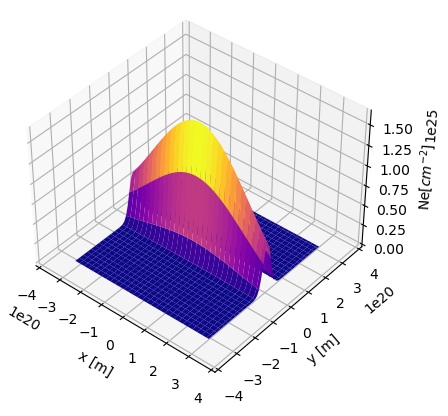

In [15]:
Z = Z.astype(float).reshape(60,60)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel('x [m]') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y [m]')
ax.set_zlabel('Ne$[cm^{-2}]$')
ax.set_xlim3d(-4e20, 4e20)
ax.set_ylim3d(-4e20, 4e20)
#ax.set_zlim3d(0, 4e23)
ax.view_init(40, -50)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

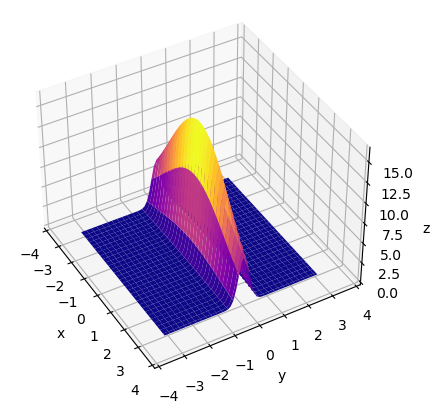

In [16]:
# Use order unity numbers to make the fit easier

X_ = X*1e-20
Y_ = Y*1e-20
Z_ = Z*1e-24

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_, Y_, Z_, cmap='plasma')
ax.set_xlabel('x') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 10)
ax.view_init(40, -30)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

## Do the fitting

We choose to fit with the function
$$
N_e^{fit}(x,y) = Ae^{-\frac{x^2}{B}} e^{-\frac{y^2}{C}}
$$

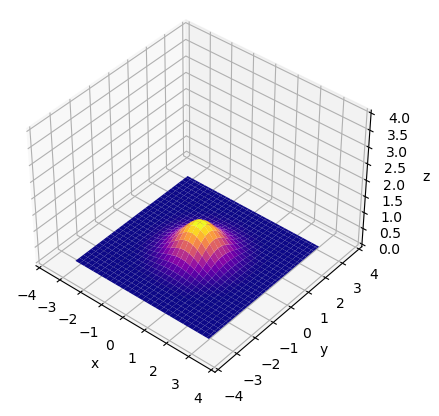

In [17]:
def Ne_fit_plot(x, y, A, B, C):
    'In cm^{-2}'
    'x,y in m'
    return A*np.exp(-x**2/B)*np.exp(-y**2/C)

fig = plt.figure()
ax = fig.gca(projection='3d')
Z1 = Ne_fit_plot(X_ , Y_, 1, 1, 1)
ax.plot_surface(X_, Y_, Z1, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(0, 4)
ax.view_init(40, -50)
plt.show()

In [18]:
def Ne_fit(X, A, B ,C):
    'In cm^{-2}'
    'x,y in m'
    x, y = X
    return A*np.exp(-x**2/B)*np.exp(-y**2/C)

In [19]:
x_data = np.vstack((X_.ravel(), Y_.ravel()))

In [20]:
p0 = [1,1,1]

In [21]:
popt, pcov = curve_fit(Ne_fit, x_data, Z_.ravel(),p0)

In [22]:
perr = np.sqrt(np.diag(pcov))

for i in range(len(popt)):
    print(i, popt[i],'pm',perr[i]/popt[i]*100,'%')

0 16.407663335898334 pm 4.2222885369944907e-16 %
1 9.52140613691841 pm 1.2128953341026454e-15 %
2 0.09521406136918413 pm 8.019647351329242e-16 %


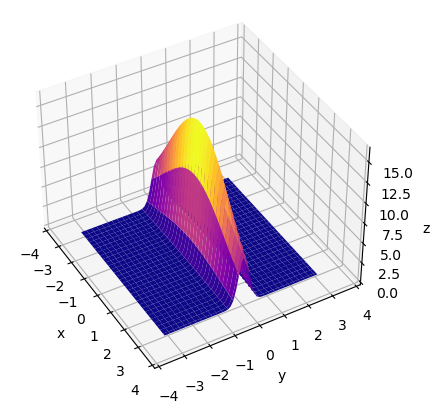

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z1 = Ne_fit_plot(X_ , Y_, popt[0], popt[1], popt[2])
ax.plot_surface(X_, Y_, Z1, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 20)
ax.view_init(40, -30)
plt.show()

Comparison of analytical and numerical lens potential


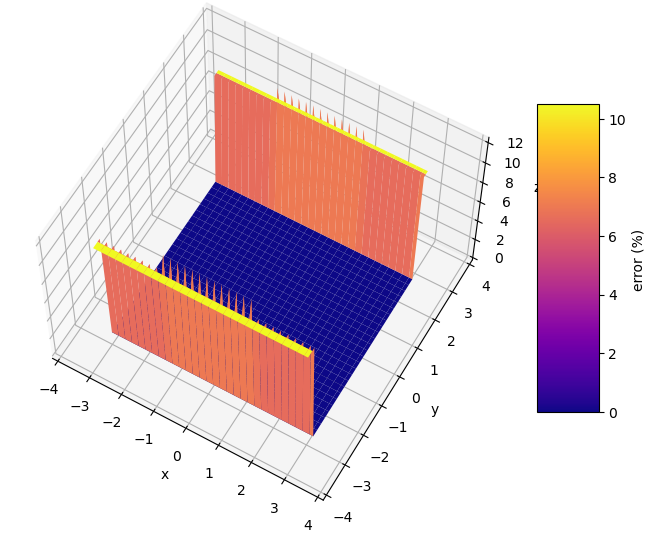

In [24]:
print('Comparison of analytical and numerical lens potential')

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
err = np.abs(Z_ - Z1)/Z_*100
surf = ax.plot_surface(X_, Y_, err,  cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5, label = 'error (%) ')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.view_init(60, -60)
plt.show()

The plasma term in the lens potential now is given by 

$$
\psi_{plasma} (x,y,w) = \psi_{w}^{2} N_e(x,y) \\
\psi_{w}^{2} = \frac{D_{ls}}{D_s D_l} \frac{2 \pi c^2}{w^2 (1 + z_l)^2} r_e
$$

$$
N_e^{fit}(x,y) = Ae^{-\frac{x^2}{B}} e^{-\frac{y^2}{C}}
$$

$$
\frac{d N_e^{fit}}{dx} = -\frac{2x}{B}N_e^{fit}
$$

$$
\frac{d N_e^{fit}}{dy} = -\frac{2y}{C}N_e^{fit}
$$

$$
\frac{d^2 N_e^{fit}}{dx^2} = \frac{4x^2}{B^2}N_e^{fit} -\frac{2}{B}N_e^{fit}
$$

$$
\frac{d^2 N_e^{fit}}{dy^2} = \frac{4y^2}{C^2}N_e^{fit} -\frac{2}{C}N_e^{fit}
$$

$$
\frac{d^2 N_e^{fit}}{dydx} = \frac{4xy}{BC}N_e^{fit} 
$$


$$
x2 = x\_ \; \frac{\pi}{180\cdot3600} \; D_l \; 10^{-20} \\
\frac{dx2}{dx\_} = \frac{\pi}{180\cdot3600} \; D_l \; 10^{-20} \\
\frac{d\psi}{dx\_} = \frac{d\psi}{dx2} \frac{dx2}{dx\_}
$$

In [25]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.4, Om0=0.314)
import scipy as sp
import multiprocessing as mp

In [26]:
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

In [27]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

In [28]:
#zl = 0.6; zs = 1.
zl = 0.2; zs = 1.2
Dl = cosmo.angular_diameter_distance(zl)   
Ds = cosmo.angular_diameter_distance(zs)    
Dls = cosmo.angular_diameter_distance_z1z2(zl, zs)
G = const.G
rho_crit = (cosmo.critical_density(zl)).to(u.kg/u.m**3)
c_light = (const.c).to(u.cm/u.second)

#r0 = 10*u.kpc
r0 = 10.0*u.kpc
#r0 = 0.1*u.kpc
pi = np.pi

def scale_radius(v,Dl,Ds,Dls):                               #this is e0 in eq 3.42 meneghetti, eq 1 barnacka 2014
    return (4.*pi*v**2/c_light**2*Dl*Dls/Ds).decompose()
def theta_E_SIS():
    'in arcsec'
    pre_theta_E = (scale_radius(v,Dl,Ds,Dls)/Dl).decompose()
    return pre_theta_E*u.rad.to('arcsec', equivalencies=u.dimensionless_angles()) 

v = 180 *u.km/u.s
ss_r = scale_radius(v,Dl,Ds,Dls) 
print('scale radius (m): ',ss_r)
print('scale radius (kpc): ',ss_r.to(u.kpc))
print('theta_E: ',theta_E_SIS() ,'arcsec')
theta_E_num = theta_E_SIS()
elipt = 0.3
re = (const.e.esu**2/const.m_e/(c_light**2)).decompose()
print('Classic electron radius: ',re)

scale radius (m):  7.705329461274929e+19 m
scale radius (kpc):  2.49712721364453 kpc
theta_E:  0.7301786792241515 arcsec
Classic electron radius:  2.817940324670788e-15 m


In [29]:
nu = 50.0 * u.MHz
omega = nu*(1.+zl)*2*np.pi


#diferente al anterior
psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

In [30]:
x_ = .1
y_ = .2
x__ = x_*np.pi/(180.*3600.) #convert arcsec to rad
y__ = y_*np.pi/(180.*3600.) 
x2 = x__*Dl.decompose().value*1e-20
y2 = y__*Dl.decompose().value*1e-20
const = 1e24*1e4 #to leave in m^-2 units

In [31]:
psi0_plasma

<Quantity 1.71019032e-29 m2>

In [32]:
psi0_plasma*const*Ne_fit_plot( x2, y2, popt[0], popt[1], popt[2])*u.m**(-2)

<Quantity 1.75553549>

In [33]:
dl = Dl.decompose().value
const = 1e28
dx2_dx_ = np.pi/(180.*3600.)*dl*1e-20
dy2_dx_ = np.pi/(180.*3600.)*dl*1e-20

A, B, C = popt[0], popt[1], popt[2]

N_e = const*A*np.exp(-x2**2/B)*np.exp(-y2**2/C)

dphiplasma_dx = -2.*x2/B*N_e
dphiplasma_dy = -2.*y2/C*N_e*psi0_plasma

dphi_dx = dphiplasma_dx*dx2_dx_
dphi_dy = dphiplasma_dy*dy2_dx_

dphi_dy

<Quantity -8.21282644 m2>

In [34]:
kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [35]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot0 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


In [36]:
# jet source

radius_3 = 0.5551103128497743

n = 200
t = np.linspace(0,1.3*radius_3*np.sqrt(2)/2,n)
t2 = np.linspace(0,1.3*1.11*radius_3*np.sqrt(2)/2,n)
a = 1.0
b = 0.9

x0 = -0.2*radius_3
y0 = -0.185*radius_3

x1 = 0.01*radius_3
y1 = 0.01*radius_3
x_source_1 = t + x0
y_source_1 = a*t + y0
x_source_2 = t2 + x0 + x1
y_source_2 = b*t2 + y0 - y1
        
mesh_x = []
mesh_y = []
n1 = 7  #n1 lower implies a higher number of points
for j in range(len(x_source_1)):
    for i in range(int(j/n1)):
        mesh_x.append(x_source_1[j]+j*0.02/n)
        z = np.linspace(y_source_2[j]-j*0.02/n, y_source_1[j]+j*0.02/n,int(j/n1))
        mesh_y.append(z[i])
        
mesh__x = []
mesh__y = []
limit = len(mesh_x) - int(n/n1)
for i in range(61):
    mesh_x[i] = 0.
    mesh_y[i] = 0.
for i in range(len(mesh_x)):
    if np.sqrt(mesh_x[i]**2+mesh_y[i]**2) < np.sqrt(mesh_x[limit]**2+mesh_y[limit]**2) and np.sqrt(mesh_x[i]**2+mesh_y[i]**2)>0.001:
        mesh__x.append(mesh_x[i])
        mesh__y.append(mesh_y[i])
        
mesh_x = mesh__x
mesh_y = mesh__y

k = np.array(mesh_y).argmin()
mesh_x[k] = 0
mesh_y[k] = 0

# fig = plt.figure(figsize=(8,8))
# ax = fig.gca()
# ax.set_xticks(np.arange(-2., 2., 0.02))
# ax.set_yticks(np.arange(-2., 2., 0.02))
# ax.set_xlabel(r'$\eta_{x}$ [arcsec]')
# ax.set_ylabel(r'$\eta_{y}$ [arcsec]')
# plt.scatter(mesh_x,mesh_y, s = .5, marker = 'o')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.grid()
# plt.show()

In [37]:
# count blobes from smaller to bigger
alpha = -(np.pi/4 + 1.5* np.pi/180)

rx_1 = 0.017/2
ry_1 = 5*rx_1
cx_1 = 0.12
cy_1 = 0.11+0.01*radius_3
rx_2 = 0.022/2
ry_2 = 5*rx_1
cx_2 = 0.18 
cy_2 = 0.167+0.01*radius_3
rx_3 = 0.027/2
ry_3 = 5*rx_3
cx_3 = 0.26
cy_3 = 0.245+0.01*radius_3 
rx_4 = 0.045/2
ry_4 = 4*rx_4
cx_4 = 0.37 
cy_4 = 0.35+0.01*radius_3   
mesh_light = []
for i in range(len(mesh_x)):
    if ( (mesh_x[i]-cx_1)*np.cos(alpha) + (mesh_y[i]-cy_1)*np.sin(alpha) )**2/rx_1**2 + \
( (mesh_x[i]-cx_1)*np.sin(alpha) - (mesh_y[i]-cy_1)*np.cos(alpha) )**2/ry_1**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_1)*np.cos(alpha) + (mesh_y[i]-cy_1)*np.sin(alpha) )**2/rx_1**2 + \
( (mesh_x[i]-cx_1)*np.sin(alpha) - (mesh_y[i]-cy_1)*np.cos(alpha) )**2/ry_1**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_2)*np.cos(alpha) + (mesh_y[i]-cy_2)*np.sin(alpha) )**2/rx_2**2 + \
( (mesh_x[i]-cx_2)*np.sin(alpha) - (mesh_y[i]-cy_2)*np.cos(alpha) )**2/ry_2**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_2)*np.cos(alpha) + (mesh_y[i]-cy_2)*np.sin(alpha) )**2/rx_2**2 + \
( (mesh_x[i]-cx_2)*np.sin(alpha) - (mesh_y[i]-cy_2)*np.cos(alpha) )**2/ry_2**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_3)*np.cos(alpha) + (mesh_y[i]-cy_3)*np.sin(alpha) )**2/rx_3**2 + \
( (mesh_x[i]-cx_3)*np.sin(alpha) - (mesh_y[i]-cy_3)*np.cos(alpha) )**2/ry_3**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_3)*np.cos(alpha) + (mesh_y[i]-cy_3)*np.sin(alpha) )**2/rx_3**2 + \
( (mesh_x[i]-cx_3)*np.sin(alpha) - (mesh_y[i]-cy_3)*np.cos(alpha) )**2/ry_3**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_4)*np.cos(alpha) + (mesh_y[i]-cy_4)*np.sin(alpha) )**2/rx_4**2 + \
( (mesh_x[i]-cx_4)*np.sin(alpha) - (mesh_y[i]-cy_4)*np.cos(alpha) )**2/ry_4**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_4)*np.cos(alpha) + (mesh_y[i]-cy_4)*np.sin(alpha) )**2/rx_4**2 + \
( (mesh_x[i]-cx_4)*np.sin(alpha) - (mesh_y[i]-cy_4)*np.cos(alpha) )**2/ry_4**2)
        light = np.exp(-r**2)
        mesh_light.append(light)    
    else:
        light = 1/np.e
        mesh_light.append(light)

In [38]:
def image_position(source):
    x_s, y_s,light = source
    x_pre, y_pre = lensEquationSolver.image_position_from_source(kwargs_lens=kwargs_lens_list, \
                    sourcePos_x=x_s, sourcePos_y=y_s, min_distance=0.05, search_window=5, \
                    precision_limit=10**(-8), num_iter_max=100,non_linear=True)
    light_pre = []
    for k in range(len(x_pre)):
        light_pre = np.append(light_pre,light)
    return x_pre, y_pre, light_pre

def main(x1,x2,x3):
    start_p = time.time()
    x = x1
    y = x2
    l = x3
    
    with mp.Pool(mp.cpu_count()-1) as pool:
        out = pool.map(image_position, zip(x,y,l))
        
        xx = []; yy = []; ll = []
        for i in range(len(out)):
            x = out[i][0]
            xx.append(x)
            y = out[i][1]
            yy.append(y)
            l = out[i][2]
            ll.append(l)
        xx = np.concatenate(xx, axis=0)
        yy = np.concatenate(yy, axis=0)
        ll = np.concatenate(ll, axis=0)
    end_p = time.time()
    pool.close()
    print('time: ',(end_p-start_p)/60.,' minutes')
        
    return xx, yy, ll

In [39]:
x_image_p_gauss_canto_rot_0, y_image_p_gauss_canto_rot_0, light_p_gauss_canto_rot_0 = main(mesh_x,mesh_y,mesh_light)

time:  0.29133144617080686  minutes


In [40]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

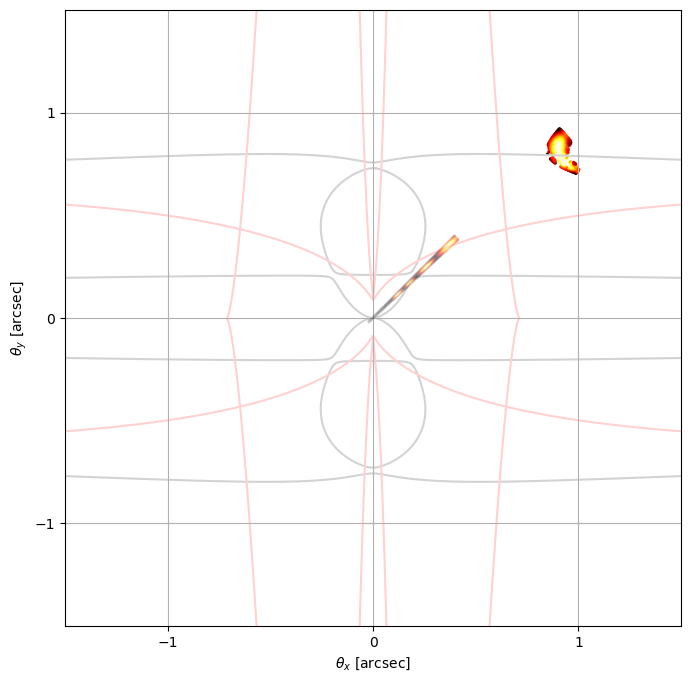

In [41]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot0[0][0],SSSpgausscantorot0[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[0][1],SSSpgausscantorot0[1][1], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[0][2],SSSpgausscantorot0[1][2], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[0][3],SSSpgausscantorot0[1][3], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[0][4],SSSpgausscantorot0[1][4], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[0][5],SSSpgausscantorot0[1][5], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[2][0],SSSpgausscantorot0[3][0], color = '#ffd1d1',zorder=1)
plt.plot(SSSpgausscantorot0[2][1],SSSpgausscantorot0[3][1], color = '#ffd1d1',zorder=1)
plt.plot(SSSpgausscantorot0[2][2],SSSpgausscantorot0[3][2], color = '#ffd1d1',zorder=1)
plt.plot(SSSpgausscantorot0[2][3],SSSpgausscantorot0[3][3], color = '#ffd1d1',zorder=1)
plt.plot(SSSpgausscantorot0[2][4],SSSpgausscantorot0[3][4], color = '#ffd1d1',zorder=1)
plt.plot(SSSpgausscantorot0[2][5],SSSpgausscantorot0[3][5], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_0, y_image_p_gauss_canto_rot_0, c=light_p_gauss_canto_rot_0, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image71.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Let's take $\alpha = 20^o$

In [42]:
alpha = 20.*np.pi/180.
time1 = time.time()
Z2 = f(X, Y)
time2 = time.time()
print('time: ',(time2-time1)/60.,'minutes')

integ_0 = 3.72860048966239e-23
integ_1 = 1.27757491318035e+16
integ_0 = 3.99497405224215e-23
integ_1 = 1.36884566799302e+16
integ_0 = 4.27037688153469e-23
integ_1 = 1.46321022828811e+16
integ_0 = 4.55410017702225e-23
integ_1 = 1.56042572927963e+16
integ_0 = 4.8453269311011e-23
integ_1 = 1.66021222989551e+16
integ_0 = 5.14313262711636e-23
integ_1 = 1.76225295195361e+16
integ_0 = 5.44648727797936e-23
integ_1 = 1.86619497867749e+16
integ_0 = 5.75425886155077e-23
integ_1 = 1.9716504318028e+16
integ_0 = 6.06521818898064e-23
integ_1 = 2.07819813967477e+16
integ_0 = 6.37804522028169e-23
integ_1 = 2.18538580122847e+16
integ_0 = 6.69133681793249e-23
integ_1 = 2.2927326426985e+16
integ_0 = 7.00361590468041e-23
integ_1 = 2.39973255546635e+16
integ_0 = 7.31334196640496e-23
integ_1 = 2.50585769478189e+16
integ_0 = 7.61892281542233e-23
integ_1 = 2.61056251036493e+16
integ_0 = 7.91872750449815e-23
integ_1 = 2.71328817128759e+16
integ_0 = 8.21110025764593e-23
integ_1 = 2.81346733925012e+16
integ_0 = 8

integ_1 = 8.4512256634593e+16
integ_0 = 1.70585472023832e-17
integ_1 = 8.70197938834683e+16
integ_0 = 1.75236481810566e-17
integ_1 = 8.9392386978237e+16
integ_0 = 1.79593717814879e-17
integ_1 = 9.16151189289627e+16
integ_0 = 1.83629261855397e-17
integ_1 = 9.36737479930159e+16
integ_0 = 1.87316816314569e-17
integ_1 = 9.55548591167488e+16
integ_0 = 1.90631988894283e-17
integ_1 = 9.72460091962497e+16
integ_0 = 1.93552560952096e-17
integ_1 = 9.87358639621772e+16
integ_0 = 1.96058735294717e-17
integ_1 = 1.00014324385234e+17
integ_0 = 1.98133359566088e-17
integ_1 = 1.01072640631855e+17
integ_0 = 1.99762121705486e-17
integ_1 = 1.01903511772135e+17
integ_0 = 2.0093371436049e-17
integ_1 = 1.02501169650876e+17
integ_0 = 2.0163996561291e-17
integ_1 = 1.02861445574062e+17
integ_0 = 2.01875933903488e-17
integ_1 = 1.02981818732254e+17
integ_0 = 2.01639965612909e-17
integ_1 = 1.02861445574062e+17
integ_0 = 2.0093371436049e-17
integ_1 = 1.02501169650876e+17
integ_0 = 1.99762121705486e-17
integ_1 = 1.0

integ_1 = 2.88172568292266e+17
integ_0 = 2.31882080640929e-12
integ_1 = 2.85822950833059e+17
integ_0 = 2.29454078644459e-12
integ_1 = 2.82830142189366e+17
integ_0 = 2.26521019202634e-12
integ_1 = 2.79214788634171e+17
integ_0 = 2.23102976289968e-12
integ_1 = 2.75001633789813e+17
integ_0 = 2.19223119222228e-12
integ_1 = 2.70219236664313e+17
integ_0 = 2.14907451217898e-12
integ_1 = 2.64899649396492e+17
integ_0 = 2.10184519397216e-12
integ_1 = 2.590780597944e+17
integ_0 = 2.05085100739316e-12
integ_1 = 2.52792404239191e+17
integ_0 = 1.99641868823241e-12
integ_1 = 2.46082956902765e+17
integ_0 = 1.93889046388615e-12
integ_1 = 2.38991901486414e+17
integ_0 = 1.87862048864319e-12
integ_1 = 2.31562891826435e+17
integ_0 = 1.81597124028513e-12
integ_1 = 2.2384060773114e+17
integ_0 = 1.75130992882874e-12
integ_1 = 2.15870312314556e+17
integ_0 = 1.68500496652391e-12
integ_1 = 2.07697416880611e+17
integ_0 = 1.61742254565642e-12
integ_1 = 1.99367059095568e+17
integ_0 = 1.54892336737214e-12
integ_1 = 1

integ_0 = 5.42162341828228e-8
integ_1 = 4.96600896344836e+17
integ_0 = 5.19201319668839e-8
integ_1 = 4.75569438964569e+17
integ_0 = 4.96051033280896e-8
integ_1 = 4.54364622466018e+17
integ_0 = 4.72825686095201e-8
integ_1 = 4.33091053019193e+17
integ_0 = 4.49634778756744e-8
integ_1 = 4.11849029214123e+17
integ_0 = 4.26582330512541e-8
integ_1 = 3.90733828880564e+17
integ_0 = 4.03766200313274e-8
integ_1 = 3.69835087241909e+17
integ_0 = 3.81277512012921e-8
integ_1 = 3.49236270419045e+17
integ_0 = 3.59200186174323e-8
integ_1 = 3.29014246581361e+17
integ_0 = 3.37610579162956e-8
integ_1 = 3.09238955369832e+17
integ_0 = 3.16577228470567e-8
integ_1 = 2.89973174622772e+17
integ_0 = 2.96160701585696e-8
integ_1 = 2.71272381946751e+17
integ_0 = 3.71985252452037e-6
integ_1 = 3.91955423566583e+17
integ_0 = 3.98560112697188e-6
integ_1 = 4.19956965388336e+17
integ_0 = 4.26035781185787e-6
integ_1 = 4.48907675689983e+17
integ_0 = 4.54341544163365e-6
integ_1 = 4.78733044421993e+17
integ_0 = 4.833958925541

integ_1 = 1.02403336251874e+18
integ_0 = 0.0444881288666994
integ_1 = 1.09207000854859e+18
integ_0 = 0.0473330670238046
integ_1 = 1.16190597865332e+18
integ_0 = 0.0502422735995429
integ_1 = 1.23331957439153e+18
integ_0 = 0.0532056868481136
integ_1 = 1.30606380558625e+18
integ_0 = 0.0562122482629276
integ_1 = 1.37986721412735e+18
integ_0 = 0.0592499501344855
integ_1 = 1.45443504139606e+18
integ_0 = 0.0623058972459975
integ_1 = 1.52945074273501e+18
integ_0 = 0.0653663826168434
integ_1 = 1.60457784675678e+18
integ_0 = 0.0684169769633869
integ_1 = 1.67946215137858e+18
integ_0 = 0.0714426312994289
integ_1 = 1.75373424240149e+18
integ_0 = 0.0744277918496672
integ_1 = 1.82701231434257e+18
integ_0 = 0.0773565262042037
integ_1 = 1.89890526720598e+18
integ_0 = 0.0802126594058353
integ_1 = 1.96901604707869e+18
integ_0 = 0.0829799184400631
integ_1 = 2.0369451929913e+18
integ_0 = 0.0856420833958264
integ_1 = 2.10229454752832e+18
integ_0 = 0.0881831433880455
integ_1 = 2.1646710843285e+18
integ_0 = 0

integ_1 = 5.07363698057623e+18
integ_0 = 432.025564269563
integ_1 = 5.15136749413224e+18
integ_0 = 437.619555788986
integ_1 = 5.21806888511203e+18
integ_0 = 442.250291321895
integ_1 = 5.27328464656468e+18
integ_0 = 445.885825147296
integ_1 = 5.31663386550187e+18
integ_0 = 448.500918305364
integ_1 = 5.34781559872031e+18
integ_0 = 450.077330388684
integ_1 = 5.36661235204926e+18
integ_0 = 450.604031422168
integ_1 = 5.37289260675502e+18
integ_0 = 450.077330388684
integ_1 = 5.36661235204926e+18
integ_0 = 448.500918305364
integ_1 = 5.34781559872031e+18
integ_0 = 445.885825147296
integ_1 = 5.31663386550187e+18
integ_0 = 442.250291321895
integ_1 = 5.27328464656468e+18
integ_0 = 437.619555788985
integ_1 = 5.21806888511203e+18
integ_0 = 432.025564269562
integ_1 = 5.15136749413224e+18
integ_0 = 425.50660226224
integ_1 = 5.07363698057622e+18
integ_0 = 418.106858764368
integ_1 = 4.98540424327443e+18
integ_0 = 409.875927651072
integ_1 = 4.88726062750215e+18
integ_0 = 400.868254579411
integ_1 = 4.779

integ_0 = 637081.586100762
integ_1 = 7.78682571822916e+18
integ_0 = 612961.543236757
integ_1 = 7.49201485852787e+18
integ_0 = 588376.793747219
integ_1 = 7.19152405204727e+18
integ_0 = 563458.551447792
integ_1 = 6.88695707942793e+18
integ_0 = 538334.91185059
integ_1 = 6.57987960737543e+18
integ_0 = 513129.813199318
integ_1 = 6.27180648975563e+18
integ_0 = 487962.090081778
integ_1 = 5.96419020023077e+18
integ_0 = 462944.628448034
integ_1 = 5.65841050434165e+18
integ_0 = 438183.628842095
integ_1 = 5.35576545424584e+18
integ_0 = 413777.982604987
integ_1 = 5.05746376426565e+18
integ_0 = 389818.763770966
integ_1 = 4.76461860051307e+18
integ_0 = 366388.837397299
integ_1 = 4.4782427936414e+18
integ_0 = 343562.58317902
integ_1 = 4.19924546068502e+18
integ_0 = 321405.731437037
integ_1 = 3.92843000039925e+18
integ_0 = 9650298.85110182
integ_1 = 4.98157713193079e+18
integ_0 = 10339722.2666848
integ_1 = 5.33746413338812e+18
integ_0 = 11052515.0731226
integ_1 = 5.70541463928878e+18
integ_0 = 1178684

integ_1 = 1.41548949060376e+19
integ_0 = 9286775329.55512
integ_1 = 1.48849648909689e+19
integ_0 = 9742944669.77373
integ_1 = 1.5616119072322e+19
integ_0 = 10197639739.9066
integ_1 = 1.63449102743105e+19
integ_0 = 10648617468.9132
integ_1 = 1.70677432733504e+19
integ_0 = 11093559546.278
integ_1 = 1.77809022510434e+19
integ_0 = 11530091225.5048
integ_1 = 1.84805809326637e+19
integ_0 = 11955801608.1049
integ_1 = 1.91629150985994e+19
integ_0 = 12368265180.0216
integ_1 = 1.98240171032149e+19
integ_0 = 12765064342.3349
integ_1 = 2.04600119873596e+19
integ_0 = 13143812651.7202
integ_1 = 2.10670747284785e+19
integ_0 = 13502178464.1946
integ_1 = 2.16414681371172e+19
integ_0 = 13837908658.8036
integ_1 = 2.21795808815581e+19
integ_0 = 14148852106.6074
integ_1 = 2.26779651042179e+19
integ_0 = 14432982545.0284
integ_1 = 2.31333730849507e+19
integ_0 = 14688420518.6079
integ_1 = 2.354279240798e+19
integ_0 = 14913454054.6313
integ_1 = 2.39034791010605e+19
integ_0 = 15106557755.9087
integ_1 = 2.421298

integ_1 = 4.04285715292172e+19
integ_0 = 3890318144479.1
integ_1 = 4.03813154708559e+19
integ_0 = 3876692164859.94
integ_1 = 4.0239878456924e+19
integ_0 = 3854088172889.17
integ_1 = 4.0005250106035e+19
integ_0 = 3822663832557.23
integ_1 = 3.96790669628367e+19
integ_0 = 3782637301004.52
integ_1 = 3.92635934879673e+19
integ_0 = 3734284706375.33
integ_1 = 3.87616958783009e+19
integ_0 = 3677936975734.57
integ_1 = 3.81768091408755e+19
integ_0 = 3613976064018.79
integ_1 = 3.75128979495855e+19
integ_0 = 3542830644123.14
integ_1 = 3.67744119084915e+19
integ_0 = 3464971326125.6
integ_1 = 3.59662359275973e+19
integ_0 = 3380905480171.73
integ_1 = 3.5093636484643e+19
integ_0 = 3291171742574.21
integ_1 = 3.41622045986809e+19
integ_0 = 3196334288143.98
integ_1 = 3.31777963771491e+19
integ_0 = 3096976953625.7
integ_1 = 3.21464720174126e+19
integ_0 = 2993697297356.75
integ_1 = 3.10744341463103e+19
integ_0 = 2887100678943.25
integ_1 = 2.99679663674756e+19
integ_0 = 2777794439918.17
integ_1 = 2.88333728

integ_1 = 3.27818835435874e+19
integ_0 = 222511201129684.0
integ_1 = 3.10285157418573e+19
integ_0 = 210117927394389.0
integ_1 = 2.9300311106601e+19
integ_0 = 197951351078029.0
integ_1 = 2.76037187425309e+19
integ_0 = 186053551350638.0
integ_1 = 2.59446064629668e+19
integ_0 = 174462298485207.0
integ_1 = 2.43282412185347e+19
integ_0 = 163210970571864.0
integ_1 = 2.27592774832102e+19
integ_0 = 1.19558720660113e+15
integ_1 = 2.53444543834347e+19
integ_0 = 1.2810007081227e+15
integ_1 = 2.7155078134752e+19
integ_0 = 1.36930947176654e+15
integ_1 = 2.90270766133837e+19
integ_0 = 1.46028621846819e+15
integ_1 = 3.09556318822947e+19
integ_0 = 1.55366897222848e+15
integ_1 = 3.29351904873131e+19
integ_0 = 1.6491612839406e+15
integ_1 = 3.49594682018905e+19
integ_0 = 1.74643288507896e+15
integ_1 = 3.70214638842159e+19
integ_0 = 1.84512078926541e+15
integ_1 = 3.9113482828581e+19
integ_0 = 1.94483085331738e+15
integ_1 = 4.12271698569984e+19
integ_0 = 2.0451398023559e+15
integ_1 = 4.33535522481117e+19
i

integ_1 = 5.54473356431112e+19
integ_0 = 6.9747177932871e+16
integ_1 = 5.83071545090343e+19
integ_0 = 7.31731813636304e+16
integ_1 = 6.11712203724307e+19
integ_0 = 7.65881124711837e+16
integ_1 = 6.4026030009567e+19
integ_0 = 7.99751249478051e+16
integ_1 = 6.68575002661624e+19
integ_0 = 8.33168074089952e+16
integ_1 = 6.96510755957947e+19
integ_0 = 8.65953246147978e+16
integ_1 = 7.23918461179116e+19
integ_0 = 8.9792569810187e+16
integ_1 = 7.50646749711486e+19
integ_0 = 9.28903264717208e+16
integ_1 = 7.76543335300838e+19
integ_0 = 9.58704375216135e+16
integ_1 = 8.01456428645979e+19
integ_0 = 9.87149798723264e+16
integ_1 = 8.25236196554315e+19
integ_0 = 1.01406442e+17
integ_1 = 8.47736246417911e+19
integ_0 = 1.03927902118272e+17
integ_1 = 8.6881511570865e+19
integ_0 = 1.06263204439199e+17
integ_1 = 8.88337745481945e+19
integ_0 = 1.08397130968209e+17
integ_1 = 9.06176916545993e+19
integ_0 = 1.10315566287449e+17
integ_1 = 9.22214627015392e+19
integ_0 = 1.12005652837506e+17
integ_1 = 9.363433

integ_0 = 1.76130229576266e+18
integ_1 = 1.15418119008824e+20
integ_0 = 1.78410814550976e+18
integ_1 = 1.16912586078186e+20
integ_0 = 1.80298694759864e+18
integ_1 = 1.18149713760061e+20
integ_0 = 1.81780846419993e+18
integ_1 = 1.19120967571002e+20
integ_0 = 1.82846979992603e+18
integ_1 = 1.19819604777454e+20
integ_0 = 1.83489659141953e+18
integ_1 = 1.20240752349467e+20
integ_0 = 1.83704387115522e+18
integ_1 = 1.20381463565636e+20
integ_0 = 1.83489659141953e+18
integ_1 = 1.20240752349467e+20
integ_0 = 1.82846979992603e+18
integ_1 = 1.19819604777454e+20
integ_0 = 1.81780846419993e+18
integ_1 = 1.19120967571002e+20
integ_0 = 1.80298694759864e+18
integ_1 = 1.18149713760061e+20
integ_0 = 1.78410814550976e+18
integ_1 = 1.16912586078186e+20
integ_0 = 1.76130229576266e+18
integ_1 = 1.15418119008824e+20
integ_0 = 1.7347254824926e+18
integ_1 = 1.13676540743549e+20
integ_0 = 1.70455785749825e+18
integ_1 = 1.11699656627638e+20
integ_0 = 1.67100160744016e+18
integ_1 = 1.09500715950611e+20
integ_0 =

integ_1 = 1.20992604865872e+20
integ_0 = 1.27028141812687e+19
integ_1 = 1.18888491236644e+20
integ_0 = 1.24527441662012e+19
integ_1 = 1.16548029794742e+20
integ_0 = 1.2179075378339e+19
integ_1 = 1.13986702137483e+20
integ_0 = 1.1883591179986e+19
integ_1 = 1.11221199153251e+20
integ_0 = 1.15681848313274e+19
integ_1 = 1.08269240289381e+20
integ_0 = 1.12348393581667e+19
integ_1 = 1.051493851298e+20
integ_0 = 1.08856068963091e+19
integ_1 = 1.01880840074458e+20
integ_0 = 1.05225878117745e+19
integ_1 = 9.84832629207227e+19
integ_0 = 1.014790989137e+19
integ_1 = 9.49765681032656e+19
integ_0 = 9.76370788820429e+18
integ_1 = 9.13807352559408e+19
integ_0 = 9.37210369187412e+18
integ_1 = 8.77156236201047e+19
integ_0 = 8.9751873737404e+18
integ_1 = 8.40007946430969e+19
integ_0 = 8.5749993345034e+18
integ_1 = 8.02553448933875e+19
integ_0 = 8.17351375479658e+18
integ_1 = 7.64977511709668e+19
integ_0 = 7.77262352042187e+18
integ_1 = 7.2745729419236e+19
integ_0 = 7.37412676284978e+18
integ_1 = 6.90161

integ_1 = 6.39011844192333e+19
integ_0 = 3.02991438949122e+19
integ_1 = 6.09093003304174e+19
integ_0 = 2.88130473075961e+19
integ_1 = 5.79218527751073e+19
integ_0 = 2.73358233178222e+19
integ_1 = 5.49522414897024e+19
integ_0 = 2.58737428252378e+19
integ_1 = 5.20130726425911e+19
integ_0 = 2.44326451377424e+19
integ_1 = 4.91160847884932e+19
integ_0 = 2.30179079691193e+19
integ_1 = 4.62720885557569e+19
integ_0 = 2.16344243118032e+19
integ_1 = 4.34909201544991e+19
integ_0 = 2.02865861169625e+19
integ_1 = 4.07814085692512e+19
integ_0 = 1.8978274609972e+19
integ_1 = 3.81513560904942e+19
integ_0 = 2.69091937346539e+19
integ_1 = 2.69091937349293e+19
integ_0 = 2.88316034487334e+19
integ_1 = 2.88316034490285e+19
integ_0 = 3.08191770997726e+19
integ_1 = 3.08191771000881e+19
integ_0 = 3.28667992964861e+19
integ_1 = 3.28667992968225e+19
integ_0 = 3.49685737204152e+19
integ_1 = 3.49685737207731e+19
integ_0 = 3.71178281636242e+19
integ_1 = 3.71178281640041e+19
integ_0 = 3.93071292413377e+19
integ_1 =

integ_1 = 1.22093216859563e+19
integ_0 = 5.43941659325596e+19
integ_1 = 1.29900864881989e+19
integ_0 = 5.77373649932336e+19
integ_1 = 1.37884891146729e+19
integ_0 = 6.11428572231885e+19
integ_1 = 1.46017682199514e+19
integ_0 = 6.45979344190435e+19
integ_1 = 1.54268889075856e+19
integ_0 = 6.80887975733806e+19
integ_1 = 1.62605557818884e+19
integ_0 = 7.16006277740544e+19
integ_1 = 1.70992298796801e+19
integ_0 = 7.51176732469843e+19
integ_1 = 1.79391494573225e+19
integ_0 = 7.86233521626431e+19
integ_1 = 1.87763545423444e+19
integ_0 = 8.21003705423409e+19
integ_1 = 1.96067150911086e+19
integ_0 = 8.55308543143587e+19
integ_1 = 2.04259625256612e+19
integ_0 = 8.88964942880568e+19
integ_1 = 2.12297243555729e+19
integ_0 = 9.21787025425296e+19
integ_1 = 2.20135615257346e+19
integ_0 = 9.53587784714876e+19
integ_1 = 2.27730080701934e+19
integ_0 = 9.8418082493997e+19
integ_1 = 2.3503612596704e+19
integ_0 = 1.01338215237389e+20
integ_1 = 2.42009810781089e+19
integ_0 = 1.04101199829496e+20
integ_1 = 

integ_0 = 1.07646174030478e+20
integ_1 = 4.64117895642304e+18
integ_0 = 1.10581145004151e+20
integ_1 = 4.76772061610958e+18
integ_0 = 1.13330733111787e+20
integ_1 = 4.88626946913596e+18
integ_0 = 1.1587732087767e+20
integ_1 = 4.99606593571872e+18
integ_0 = 1.18204313465899e+20
integ_1 = 5.0963945273246e+18
integ_0 = 1.20296318372431e+20
integ_1 = 5.1865915941166e+18
integ_0 = 1.22139314755851e+20
integ_1 = 5.26605262567235e+18
integ_0 = 1.23720809804847e+20
integ_1 = 5.3342389927885e+18
integ_0 = 1.25029979704924e+20
integ_1 = 5.39068402527889e+18
integ_0 = 1.26057792980179e+20
integ_1 = 5.43499832987181e+18
integ_0 = 1.26797114244395e+20
integ_1 = 5.46687426345158e+18
integ_0 = 1.27242786694254e+20
integ_1 = 5.48608948976475e+18
integ_0 = 1.27391692010585e+20
integ_1 = 5.49250956206998e+18
integ_0 = 1.27242786694254e+20
integ_1 = 5.48608948976475e+18
integ_0 = 1.26797114244395e+20
integ_1 = 5.46687426345158e+18
integ_0 = 1.26057792980179e+20
integ_1 = 5.43499832987181e+18
integ_0 = 1.

integ_0 = 1.09315950293347e+20
integ_1 = 5.0725223958674e+17
integ_0 = 1.0867855718664e+20
integ_1 = 5.04294582629939e+17
integ_0 = 1.07792445656592e+20
integ_1 = 5.00182812509165e+17
integ_0 = 1.06663767353658e+20
integ_1 = 4.94945474358603e+17
integ_0 = 1.05300308609384e+20
integ_1 = 4.88618698624948e+17
integ_0 = 1.03711400989196e+20
integ_1 = 4.81245786010879e+17
integ_0 = 1.01907814955407e+20
integ_1 = 4.72876714045887e+17
integ_0 = 9.99016383351926e+19
integ_1 = 4.63567573148518e+17
integ_0 = 9.77061415110589e+19
integ_1 = 4.5337994107782e+17
integ_0 = 9.53356314352368e+19
integ_1 = 4.42380205525076e+17
integ_0 = 9.28052967112772e+19
integ_1 = 4.3063884525525e+17
integ_0 = 9.01310460837926e+19
integ_1 = 4.18229680660626e+17
integ_0 = 8.73293427295949e+19
integ_1 = 4.05229104831932e+17
integ_0 = 8.44170367504538e+19
integ_1 = 3.91715306284538e+17
integ_0 = 8.14111982302963e+19
integ_1 = 3.77767494303812e+17
integ_0 = 7.83289531399254e+19
integ_1 = 3.63465137503635e+17
integ_0 = 7.

integ_0 = 6.30283169216152e+19
integ_1 = 1.63545916728529e+16
integ_0 = 6.0642051584549e+19
integ_1 = 1.57354033918246e+16
integ_0 = 5.82098114820701e+19
integ_1 = 1.51042855757508e+16
integ_0 = 5.57445779750237e+19
integ_1 = 1.44646066289669e+16
integ_0 = 5.32590239215018e+19
integ_1 = 1.38196549054946e+16
integ_0 = 5.07654108890546e+19
integ_1 = 1.31726120376595e+16
integ_0 = 4.82754955258489e+19
integ_1 = 1.25265286412738e+16
integ_0 = 4.58004459641801e+19
integ_1 = 1.18843026240139e+16
integ_0 = 4.33507689298603e+19
integ_1 = 1.12486602717599e+16
integ_0 = 4.09362480281904e+19
integ_1 = 1.06221402350359e+16
integ_0 = 3.85658934757891e+19
integ_1 = 1.00070804854217e+16
integ_0 = 3.62479033515288e+19
integ_1 = 9.40560826094321e+15
integ_0 = 3.3989636252948e+19
integ_1 = 8.81963297095634e+15
integ_0 = 3.17975950700812e+19
integ_1 = 8.25084198577981e+15
integ_0 = 2.53444621339616e+19
integ_1 = 1.19558720660112e+15
integ_0 = 2.71550864389813e+19
integ_1 = 1.28100070812269e+15
integ_0 = 

integ_1 = 19426212817621.2
integ_0 = 2.27082837013909e+19
integ_1 = 20668485205801.2
integ_0 = 2.41039906019091e+19
integ_1 = 21938821079895.9
integ_0 = 2.55257034340643e+19
integ_1 = 23232826871998.0
integ_0 = 2.6968116822128e+19
integ_1 = 24545673768041.4
integ_0 = 2.84254700053665e+19
integ_1 = 25872118474452.5
integ_0 = 2.98915764368336e+19
integ_1 = 27206530158196.4
integ_0 = 3.13598601216869e+19
integ_1 = 28542923520960.9
integ_0 = 3.2823398536477e+19
integ_1 = 29874997863169.2
integ_0 = 3.42749718522444e+19
integ_1 = 31196181885554.7
integ_0 = 3.57071180648471e+19
integ_1 = 32499683867340.8
integ_0 = 3.71121935182374e+19
integ_1 = 33778546752942.8
integ_0 = 3.84824381930436e+19
integ_1 = 35025707575925.9
integ_0 = 3.98100450263991e+19
integ_1 = 36234060552097.8
integ_0 = 4.10872324320868e+19
integ_1 = 37396523085445.2
integ_0 = 4.23063191051846e+19
integ_1 = 38506103853364.2
integ_0 = 4.34598001247841e+19
integ_1 = 39555972073361.2
integ_0 = 4.45404233140164e+19
integ_1 = 405395

integ_0 = 3.17091656250673e+19
integ_1 = 269416984007.614
integ_0 = 3.1895137946674e+19
integ_1 = 270997098179.92
integ_0 = 3.20072444749021e+19
integ_1 = 271949611503.036
integ_0 = 3.20447008131925e+19
integ_1 = 272267859350.157
integ_0 = 3.20072444749021e+19
integ_1 = 271949611503.036
integ_0 = 3.1895137946674e+19
integ_1 = 270997098179.92
integ_0 = 3.17091656250673e+19
integ_1 = 269416984007.614
integ_0 = 3.14506246764577e+19
integ_1 = 267220290362.613
integ_0 = 3.11213099691996e+19
integ_1 = 264422267347.189
integ_0 = 3.07234933228955e+19
integ_1 = 261042217480.77
integ_0 = 3.02598974103648e+19
integ_1 = 257103273957.969
integ_0 = 2.97336647316751e+19
integ_1 = 252632137036.386
integ_0 = 2.91483221547187e+19
integ_1 = 247658772755.55
integ_0 = 2.85077415818077e+19
integ_1 = 242216078740.57
integ_0 = 2.78160973554213e+19
integ_1 = 236339522299.994
integ_0 = 2.70778210576315e+19
integ_1 = 230066756379.039
integ_0 = 2.62975543862198e+19
integ_1 = 223437219171.436
integ_0 = 2.548010080

integ_1 = 454630510.005341
integ_0 = 1.13674251557652e+19
integ_1 = 433344491.576458
integ_0 = 1.08098816228805e+19
integ_1 = 412090037.249379
integ_0 = 1.02556668503345e+19
integ_1 = 390962480.609054
integ_0 = 9.70713351128037e+18
integ_1 = 370051509.332098
integ_0 = 9.16647235723698e+18
integ_1 = 349440638.382554
integ_0 = 8.63570096200617e+18
integ_1 = 329206780.911941
integ_0 = 8.11665504495613e+18
integ_1 = 309419917.488889
integ_0 = 7.61098234822672e+18
integ_1 = 290142862.688386
integ_0 = 7.12013900335456e+18
integ_1 = 271431126.581689
integ_0 = 4.98323959437657e+18
integ_1 = 9650298.85110171
integ_0 = 5.33924536319596e+18
integ_1 = 10339722.2666847
integ_0 = 5.70731866231688e+18
integ_1 = 11052515.0731225
integ_0 = 6.08651218649321e+18
integ_1 = 11786842.7652594
integ_0 = 6.47573401272294e+18
integ_1 = 12540590.7782442
integ_0 = 6.8737485331653e+18
integ_1 = 13311366.2941719
integ_0 = 7.27917917973363e+18
integ_1 = 14096503.5183975
integ_0 = 7.69051301545274e+18
integ_1 = 14893

integ_1 = 16153.9171976455
integ_0 = 5.82401072050231e+18
integ_1 = 16750.3470208101
integ_0 = 6.02493344767693e+18
integ_1 = 17328.2177641957
integ_0 = 6.2182255957862e+18
integ_1 = 17884.1423173272
integ_0 = 6.40272466046934e+18
integ_1 = 18414.7772194193
integ_0 = 6.57729483168208e+18
integ_1 = 18916.8557847973
integ_0 = 6.74083855017885e+18
integ_1 = 19387.2213403158
integ_0 = 6.89230793992279e+18
integ_1 = 19822.8601059365
integ_0 = 7.03071595083048e+18
integ_1 = 20220.9332422036
integ_0 = 7.15514704673809e+18
integ_1 = 20578.8075897379
integ_0 = 7.26476727708587e+18
integ_1 = 20894.084636252
integ_0 = 7.35883357755425e+18
integ_1 = 21164.6272659663
integ_0 = 7.43670215467236e+18
integ_1 = 21388.5838744515
integ_0 = 7.49783582210744e+18
integ_1 = 21564.4094684167
integ_0 = 7.54181017171192e+18
integ_1 = 21690.8834141628
integ_0 = 7.56831848016694e+18
integ_1 = 21767.1235495034
integ_0 = 7.57717527186937e+18
integ_1 = 21792.5964309294
integ_0 = 7.56831848016694e+18
integ_1 = 21767.

integ_0 = 3.48110157206324e+18
integ_1 = 7.04791343993547
integ_0 = 3.41257194467871e+18
integ_1 = 6.90916687598762
integ_0 = 3.33757526803231e+18
integ_1 = 6.75732698440602
integ_0 = 3.25660025787095e+18
integ_1 = 6.59338322964884
integ_0 = 3.17016574655034e+18
integ_1 = 6.41838605091104
integ_0 = 3.07881516595452e+18
integ_1 = 6.23343569212401
integ_0 = 2.98311088699397e+18
integ_1 = 6.03967074158118
integ_0 = 2.88362849767227e+18
integ_1 = 5.83825654718819
integ_0 = 2.78095110043373e+18
integ_1 = 5.63037367074968
integ_0 = 2.67566370678026e+18
integ_1 = 5.4172065391896
integ_0 = 2.56834780307432e+18
integ_1 = 5.19993244235833
integ_0 = 2.45957615615294e+18
integ_1 = 4.97971101636681
integ_0 = 2.34990792101784e+18
integ_1 = 4.75767433851011
integ_0 = 2.239884105607e+18
integ_1 = 4.53491774514606
integ_0 = 2.13002343967957e+18
integ_1 = 4.3124914677504
integ_0 = 2.02081868635083e+18
integ_1 = 4.09139316517076
integ_0 = 1.91273342599442e+18
integ_1 = 3.87256141224568
integ_0 = 1.806199

integ_0 = 7.73889694692109e+17
integ_1 = 0.000529935499249544
integ_0 = 7.27375313515144e+17
integ_1 = 0.000498083903369196
integ_0 = 6.82059375572436e+17
integ_1 = 0.000467052963995873
integ_0 = 6.38072372319775e+17
integ_1 = 0.000436932037604078
integ_0 = 3.90706016130494e+17
integ_1 = 3.71985252452036e-6
integ_0 = 4.18618299499702e+17
integ_1 = 3.98560112697187e-6
integ_0 = 4.47476725754347e+17
integ_1 = 4.26035781185786e-6
integ_0 = 4.77207022355096e+17
integ_1 = 4.54341544163364e-6
integ_0 = 5.07723578149215e+17
integ_1 = 4.83395892554177e-6
integ_0 = 5.38929516515014e+17
integ_1 = 5.13106591600918e-6
integ_0 = 5.70716908980886e+17
integ_1 = 5.43370884248155e-6
integ_0 = 6.0296713520618e+17
integ_1 = 5.7407583387464e-6
integ_0 = 6.35551393116243e+17
integ_1 = 6.0509880998512e-6
integ_0 = 6.68331360687568e+17
integ_1 = 6.36308118285907e-6
integ_0 = 7.01160008418713e+17
integ_1 = 6.67563774226076e-6
integ_0 = 7.33882558942006e+17
integ_1 = 6.98718416629166e-6
integ_0 = 7.66337587579

integ_0 = 3.08068963085555e+17
integ_1 = 3.1424101998575e-10
integ_0 = 3.21692923618898e+17
integ_1 = 3.28137931934826e-10
integ_0 = 3.35134548142121e+17
integ_1 = 3.41848854833833e-10
integ_0 = 3.48322095967245e+17
integ_1 = 3.55300610694507e-10
integ_0 = 3.61182734260746e+17
integ_1 = 3.68418907502274e-10
integ_0 = 3.73643188655273e+17
integ_1 = 3.81129002862756e-10
integ_0 = 3.85630423898414e+17
integ_1 = 3.93356398287097e-10
integ_0 = 3.97072345942997e+17
integ_1 = 4.0502755534841e-10
integ_0 = 4.07898516220642e+17
integ_1 = 4.16070624265553e-10
integ_0 = 4.18040868330313e+17
integ_1 = 4.26416174950295e-10
integ_0 = 4.27434417032401e+17
integ_1 = 4.35997920205854e-10
integ_0 = 4.36017949278873e+17
integ_1 = 4.44753420601598e-10
integ_0 = 4.43734687039805e+17
integ_1 = 4.52624760579083e-10
integ_0 = 4.50532911910498e+17
integ_1 = 4.59559185572963e-10
integ_0 = 4.56366541901144e+17
integ_1 = 4.65509690356435e-10
integ_0 = 4.61195651417977e+17
integ_1 = 4.70435549440042e-10
integ_0 = 

integ_0 = 1.68584068045126e+17
integ_1 = 9.30735740649291e-15
integ_0 = 1.69969919210921e+17
integ_1 = 9.38386886016602e-15
integ_0 = 1.70966782416113e+17
integ_1 = 9.43890467845946e-15
integ_0 = 1.71567704489284e+17
integ_1 = 9.47208098374922e-15
integ_0 = 1.71768480847402e+17
integ_1 = 9.48316564522078e-15
integ_0 = 1.71567704489284e+17
integ_1 = 9.47208098374921e-15
integ_0 = 1.70966782416113e+17
integ_1 = 9.43890467845946e-15
integ_0 = 1.69969919210921e+17
integ_1 = 9.38386886016602e-15
integ_0 = 1.68584068045126e+17
integ_1 = 9.3073574064929e-15
integ_0 = 1.6681884991074e+17
integ_1 = 9.20990148276493e-15
integ_0 = 1.64686442390701e+17
integ_1 = 9.09217340112922e-15
integ_0 = 1.62201439766189e+17
integ_1 = 8.95497889722028e-15
integ_0 = 1.59380686708835e+17
integ_1 = 8.79924794847358e-15
integ_0 = 1.56243088208377e+17
integ_1 = 8.62602428042197e-15
integ_0 = 1.52809398734704e+17
integ_1 = 8.43645372654353e-15
integ_0 = 1.49101993920852e+17
integ_1 = 8.23177162310875e-15
integ_0 = 

integ_0 = 5.53940046106912e+16
integ_1 = 9.16484709496287e-20
integ_0 = 5.40500558676644e+16
integ_1 = 8.94249298245787e-20
integ_0 = 5.26154953456962e+16
integ_1 = 8.70514729992942e-20
integ_0 = 5.10993424273839e+16
integ_1 = 8.45430228941663e-20
integ_0 = 4.95109308278669e+16
integ_1 = 8.19150219876153e-20
integ_0 = 4.78598136274397e+16
integ_1 = 7.91832756941079e-20
integ_0 = 4.61556686241724e+16
integ_1 = 7.63637957716227e-20
integ_0 = 4.44082053009179e+16
integ_1 = 7.3472646400091e-20
integ_0 = 4.26270746335061e+16
integ_1 = 7.0525794960535e-20
integ_0 = 4.0821782879104e+16
integ_1 = 6.75389693993262e-20
integ_0 = 3.90016103781549e+16
integ_1 = 6.45275238873268e-20
integ_0 = 3.71755362828291e+16
integ_1 = 6.15063142843468e-20
integ_0 = 3.53521699925744e+16
integ_1 = 5.84895847003895e-20
integ_0 = 3.35396899363664e+16
integ_1 = 5.5490866211889e-20
integ_0 = 3.17457901948752e+16
integ_1 = 5.25228885489621e-20
integ_0 = 2.9977635307252e+16
integ_1 = 4.95975053239786e-20
integ_0 = 2.8

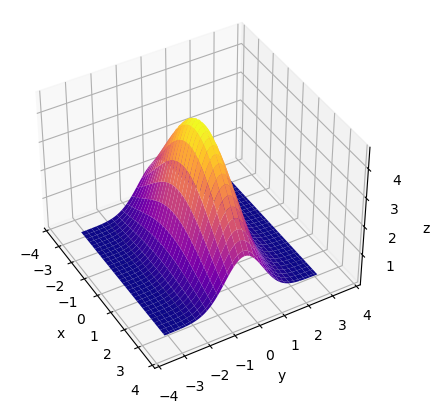

In [43]:
Z2 = Z2.astype(float).reshape(60,60)

X_ = X*1e-20
Y_ = Y*1e-20
Z2_ = Z2*1e-24

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_, Y_, Z2_, cmap='plasma')
ax.set_xlabel('x') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 10)
ax.view_init(40, -30)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

Do the fit

In [44]:
popt, pcov = curve_fit(Ne_fit, x_data, Z2_.ravel(),p0)
perr = np.sqrt(np.diag(pcov))

for i in range(len(popt)):
    print(i, popt[i],'pm',perr[i]/popt[i]*100,'%')

0 4.6258613132604625 pm 0.0001081246268497071 %
1 9.521406136918367 pm 0.0003105988464008077 %
2 1.1978690440773478 pm 0.00020536800832971427 %


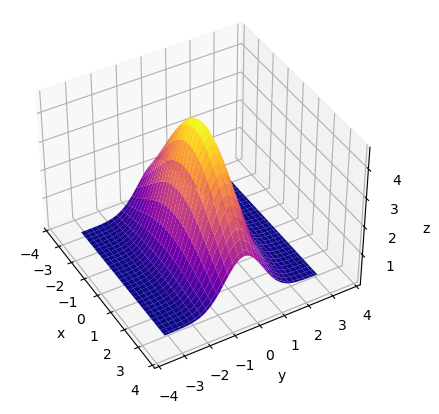

In [45]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z2fit = Ne_fit_plot(X_ , Y_, popt[0], popt[1], popt[2])
ax.plot_surface(X_, Y_, Z2fit, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 20)
ax.view_init(40, -30)
plt.show()

Comparison of analytical and numerical lens potential


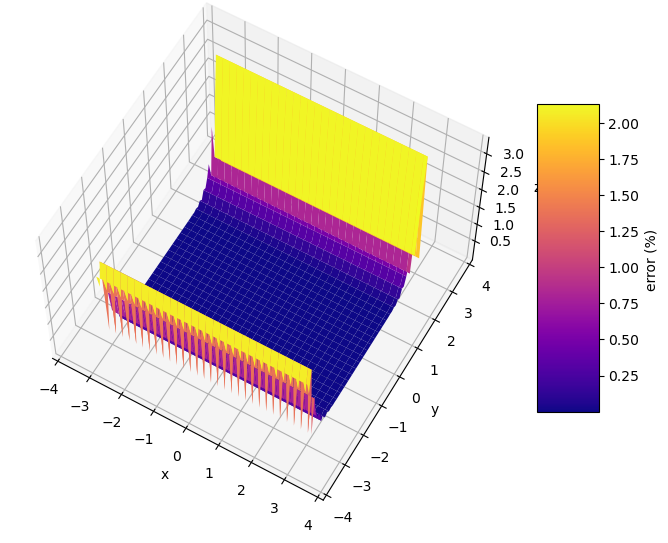

In [46]:
print('Comparison of analytical and numerical lens potential')

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
err = np.abs(Z2_ - Z2fit)/Z2_*100
surf = ax.plot_surface(X_, Y_, err,  cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5, label = 'error (%) ')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.view_init(60, -60)
plt.show()

In [47]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [48]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot2 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


In [49]:
x_image_p_gauss_canto_rot_2, y_image_p_gauss_canto_rot_2, light_p_gauss_canto_rot_2 = main(mesh_x,mesh_y,mesh_light)

time:  0.24963823954264322  minutes


In [50]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

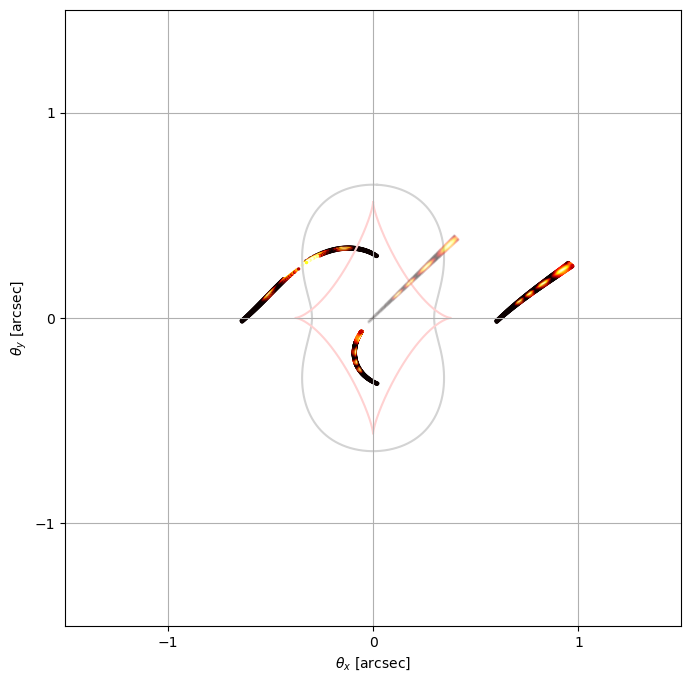

In [51]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot2[0][0],SSSpgausscantorot2[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot2[2][0],SSSpgausscantorot2[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_2, y_image_p_gauss_canto_rot_2, c=light_p_gauss_canto_rot_2, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image72.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Let's take $\alpha = 30^o$

In [52]:
alpha = 30.*np.pi/180.
time1 = time.time()
Z3 = f(X, Y)
time2 = time.time()
print('time: ',(time2-time1)/60.,'minutes')

integ_0 = 2.15207679670303e-17
integ_1 = 6.14724834828673e+17
integ_0 = 2.30582251573954e-17
integ_1 = 6.58641163411893e+17
integ_0 = 2.46477975460438e-17
integ_1 = 7.04046124125058e+17
integ_0 = 2.62853940721286e-17
integ_1 = 7.50822858838042e+17
integ_0 = 2.79662991242249e-17
integ_1 = 7.98836669594962e+17
integ_0 = 2.96851765692538e-17
integ_1 = 8.479351336974e+17
integ_0 = 3.14360815189909e-17
integ_1 = 8.97948439806029e+17
integ_0 = 3.32124801584401e-17
integ_1 = 9.48689954323455e+17
integ_0 = 3.50072778449597e-17
integ_1 = 9.99957024025009e+17
integ_0 = 3.68128555605423e-17
integ_1 = 1.05153201729115e+18
integ_0 = 3.86211146641272e-17
integ_1 = 1.10318360242425e+18
integ_0 = 4.04235297486853e-17
integ_1 = 1.15466825747211e+18
integ_0 = 4.22112092617349e-17
integ_1 = 1.20573200180826e+18
integ_0 = 4.39749634008828e-17
integ_1 = 1.25611233551787e+18
integ_0 = 4.57053786510328e-17
integ_1 = 1.30554036849807e+18
integ_0 = 4.73928981902862e-17
integ_1 = 1.35374311719304e+18
integ_0 = 

integ_1 = 2.22642409845361e+18
integ_0 = 2.98984008895305e-12
integ_1 = 2.31403390902114e+18
integ_0 = 3.10023001937839e-12
integ_1 = 2.39947193735e+18
integ_0 = 3.20718495134122e-12
integ_1 = 2.48225139442314e+18
integ_0 = 3.31007798310865e-12
integ_1 = 2.56188707975345e+18
integ_0 = 3.40829029182991e-12
integ_1 = 2.63790004563211e+18
integ_0 = 3.50121726453903e-12
integ_1 = 2.70982234231484e+18
integ_0 = 3.58827464988682e-12
integ_1 = 2.7772017792519e+18
integ_0 = 3.66890464382691e-12
integ_1 = 2.83960663520086e+18
integ_0 = 3.74258182110749e-12
integ_1 = 2.89663024899819e+18
integ_0 = 3.808818824676e-12
integ_1 = 2.94789542296378e+18
integ_0 = 3.8671717270254e-12
integ_1 = 2.99305857239951e+18
integ_0 = 3.91724498109709e-12
integ_1 = 3.03181355741862e+18
integ_0 = 3.95869588356504e-12
integ_1 = 3.06389513737494e+18
integ_0 = 3.99123848008014e-12
integ_1 = 3.08908199338834e+18
integ_0 = 4.01464685023415e-12
integ_1 = 3.10719927079439e+18
integ_0 = 4.02875771945799e-12
integ_1 = 3.118

integ_0 = 5.76451924568435e-8
integ_1 = 4.91665595308236e+18
integ_0 = 5.79832779932913e-8
integ_1 = 4.94549184024974e+18
integ_0 = 5.81870803409086e-8
integ_1 = 4.96287448714462e+18
integ_0 = 5.82551735179733e-8
integ_1 = 4.96868226937433e+18
integ_0 = 5.81870803409086e-8
integ_1 = 4.96287448714462e+18
integ_0 = 5.79832779932913e-8
integ_1 = 4.94549184024973e+18
integ_0 = 5.76451924568435e-8
integ_1 = 4.91665595308236e+18
integ_0 = 5.71751818953296e-8
integ_1 = 4.87656795741804e+18
integ_0 = 5.65765092622106e-8
integ_1 = 4.82550615607571e+18
integ_0 = 5.58533045771714e-8
integ_1 = 4.76382280541889e+18
integ_0 = 5.50105174816033e-8
integ_1 = 4.69194006873259e+18
integ_0 = 5.40538608354199e-8
integ_1 = 4.61034520550034e+18
integ_0 = 5.29897462541406e-8
integ_1 = 4.51958507325296e+18
integ_0 = 5.18252126033283e-8
integ_1 = 4.42026002873832e+18
integ_0 = 5.05678485650205e-8
integ_1 = 4.31301732348123e+18
integ_0 = 4.92257104660358e-8
integ_1 = 4.19854409522074e+18
integ_0 = 4.780723660983

integ_0 = 0.000353606274071427
integ_1 = 6.65485165648301e+18
integ_0 = 0.000343416857800717
integ_1 = 6.46308737309805e+18
integ_0 = 0.00033274182179266
integ_1 = 6.26218375155518e+18
integ_0 = 0.000321645368220146
integ_1 = 6.05334907340348e+18
integ_0 = 0.000310192537430973
integ_1 = 5.83780739460014e+18
integ_0 = 0.000298448582712831
integ_1 = 5.61678677862005e+18
integ_0 = 0.000286478364152694
integ_1 = 5.39150788892111e+18
integ_0 = 0.000274345769245209
integ_1 = 5.16317308482426e+18
integ_0 = 0.000262113167195203
integ_1 = 4.93295615151516e+18
integ_0 = 0.000249840903049744
integ_1 = 4.70199277963589e+18
integ_0 = 0.000237586836905765
integ_1 = 4.47137189319642e+18
integ_0 = 0.000225405932491702
integ_1 = 4.24212790670252e+18
integ_0 = 0.000213349898437881
integ_1 = 4.0152339738831e+18
integ_0 = 0.000201466884552224
integ_1 = 3.79159627161484e+18
integ_0 = 0.000189801234426506
integ_1 = 3.57204934398482e+18
integ_0 = 0.000178393294733647
integ_1 = 3.35735251327545e+18
integ_0 = 

integ_1 = 5.43111268640473e+18
integ_0 = 27.5488215999633
integ_1 = 5.80551907315035e+18
integ_0 = 29.3791617942769
integ_1 = 6.19123702010077e+18
integ_0 = 31.2579078899543
integ_1 = 6.58715581657215e+18
integ_0 = 33.179095695755
integ_1 = 6.99201859479328e+18
integ_0 = 35.1360806153484
integ_1 = 7.40442510137804e+18
integ_0 = 37.1215598094705
integ_1 = 7.82283636768185e+18
integ_0 = 39.1276036022918
integ_1 = 8.2455813282436e+18
integ_0 = 41.1456962240983
integ_1 = 8.67086540672112e+18
integ_0 = 43.1667858309126
integ_1 = 9.09678105680909e+18
integ_0 = 45.1813435828097
integ_1 = 9.52132021214694e+18
integ_0 = 47.1794313994153
integ_1 = 9.94238856481829e+18
integ_0 = 49.1507778466918
integ_1 = 1.03578215574028e+19
integ_0 = 51.0848614471102
integ_1 = 1.07654019394004e+19
integ_0 = 52.9710005492551
integ_1 = 1.11628787059613e+19
integ_0 = 54.7984487464326
integ_1 = 1.15479872059896e+19
integ_0 = 56.5564947005066
integ_1 = 1.19184701785849e+19
integ_0 = 58.2345651103469
integ_1 = 1.2272

integ_0 = 84262.7179378365
integ_1 = 2.03179590235717e+19
integ_0 = 85154.3562499106
integ_1 = 2.0532956487835e+19
integ_0 = 85854.3705825216
integ_1 = 2.07017483672566e+19
integ_0 = 86357.9012274494
integ_1 = 2.0823162858281e+19
integ_0 = 86661.4360329066
integ_1 = 2.08963530886752e+19
integ_0 = 86762.8512005674
integ_1 = 2.0920806954766e+19
integ_0 = 86661.4360329065
integ_1 = 2.08963530886752e+19
integ_0 = 86357.9012274494
integ_1 = 2.0823162858281e+19
integ_0 = 85854.3705825216
integ_1 = 2.07017483672566e+19
integ_0 = 85154.3562499105
integ_1 = 2.0532956487835e+19
integ_0 = 84262.7179378364
integ_1 = 2.03179590235717e+19
integ_0 = 83185.6067271686
integ_1 = 2.00582391619559e+19
integ_0 = 81930.3944095196
integ_1 = 1.97555744359654e+19
integ_0 = 80505.5894826708
integ_1 = 1.94120164683521e+19
integ_0 = 78920.7411421641
integ_1 = 1.90298678214885e+19
integ_0 = 77186.3327838694
integ_1 = 1.86116563180337e+19
integ_0 = 75313.6666776224
integ_1 = 1.81601072327119e+19
integ_0 = 73314.741

integ_1 = 1.98552364739284e+19
integ_0 = 35777784.7357179
integ_1 = 1.90143508397096e+19
integ_0 = 34182515.3641255
integ_1 = 1.81665339125475e+19
integ_0 = 32582073.6076367
integ_1 = 1.73159680857031e+19
integ_0 = 30984005.075934
integ_1 = 1.64666635255647e+19
integ_0 = 29395477.6595583
integ_1 = 1.56224296570739e+19
integ_0 = 27823234.7475177
integ_1 = 1.47868503009004e+19
integ_0 = 26273555.6182122
integ_1 = 1.39632626229251e+19
integ_0 = 24752223.1764967
integ_1 = 1.31547399878797e+19
integ_0 = 23264499.083896
integ_1 = 1.23640787421274e+19
integ_0 = 21815106.2090413
integ_1 = 1.15937888868265e+19
integ_0 = 20408218.2134487
integ_1 = 1.08460885432201e+19
integ_0 = 368505039.317499
integ_1 = 1.17588531519874e+19
integ_0 = 394831270.948844
integ_1 = 1.25989130121498e+19
integ_0 = 422049883.057589
integ_1 = 1.3467448387895e+19
integ_0 = 450090823.471777
integ_1 = 1.4362223941534e+19
integ_0 = 478873345.696852
integ_1 = 1.52806630836833e+19
integ_0 = 508306077.90384
integ_1 = 1.6219850

integ_0 = 161275742908.141
integ_1 = 3.02941715692579e+19
integ_0 = 168014492261.058
integ_1 = 3.15599839312309e+19
integ_0 = 174625864213.875
integ_1 = 3.28018696149378e+19
integ_0 = 181073345158.511
integ_1 = 3.40129698734409e+19
integ_0 = 187320200130.774
integ_1 = 3.51863843800836e+19
integ_0 = 193329814043.023
integ_1 = 3.63152353259222e+19
integ_0 = 199066043666.225
integ_1 = 3.73927335363315e+19
integ_0 = 204493575719.885
integ_1 = 3.84122457349197e+19
integ_0 = 209578286172.704
integ_1 = 3.93673620348672e+19
integ_0 = 214287595685.735
integ_1 = 4.02519627056683e+19
integ_0 = 218590816049.593
integ_1 = 4.10602832481896e+19
integ_0 = 222459482482.231
integ_1 = 4.17869768137639e+19
integ_0 = 225867666766.0
integ_1 = 4.242717302412e+19
integ_0 = 228792266412.174
integ_1 = 4.29765322882906e+19
integ_0 = 231213265345.413
integ_1 = 4.34312947698023e+19
integ_0 = 233113961995.114
integ_1 = 4.37883232315464e+19
integ_0 = 234481161158.402
integ_1 = 4.40451390754864e+19
integ_0 = 23530532

integ_1 = 5.49994154920333e+19
integ_0 = 25693953074199.9
integ_1 = 5.44235249779831e+19
integ_0 = 25365513100034.7
integ_1 = 5.37278414027026e+19
integ_0 = 24982765341866.9
integ_1 = 5.29171260520223e+19
integ_0 = 24548304267903.6
integ_1 = 5.19968743864837e+19
integ_0 = 24065041682892.4
integ_1 = 5.09732540315182e+19
integ_0 = 23536174254210.6
integ_1 = 4.98530359929865e+19
integ_0 = 22965148345776.8
integ_1 = 4.86435201702956e+19
integ_0 = 22355622700166.8
integ_1 = 4.7352456311699e+19
integ_0 = 21711429532833.6
integ_1 = 4.59879616062032e+19
integ_0 = 21036534614938.0
integ_1 = 4.45584361332044e+19
integ_0 = 20334996922971.3
integ_1 = 4.3072477394528e+19
integ_0 = 19610928424345.4
integ_1 = 4.1538795134467e+19
integ_0 = 18868454548914.1
integ_1 = 3.9966127612722e+19
integ_0 = 18111675867676.9
integ_1 = 3.83631604343289e+19
integ_0 = 17344631462602.5
integ_1 = 3.67384489616241e+19
integ_0 = 16571264426654.5
integ_1 = 3.51003452382882e+19
integ_0 = 15795389881913.7
integ_1 = 3.345693

integ_1 = 3.88536475641017e+19
integ_0 = 809705196292089.0
integ_1 = 3.68616492982057e+19
integ_0 = 766397403492922.0
integ_1 = 3.48900716458049e+19
integ_0 = 723711135281319.0
integ_1 = 3.29467887622681e+19
integ_0 = 681805683102208.0
integ_1 = 3.10390523552612e+19
integ_0 = 640825980633041.0
integ_1 = 2.91734604982734e+19
integ_0 = 600902120377042.0
integ_1 = 2.7355935623632e+19
integ_0 = 562149066801066.0
integ_1 = 2.55917114631674e+19
integ_0 = 3.07016878725763e+15
integ_1 = 2.60356018534478e+19
integ_0 = 3.28950357516274e+15
integ_1 = 2.7895601614441e+19
integ_0 = 3.51627315607136e+15
integ_1 = 2.98186498017309e+19
integ_0 = 3.74989389619594e+15
integ_1 = 3.1799797092341e+19
integ_0 = 3.98969306289834e+15
integ_1 = 3.38333385884844e+19
integ_0 = 4.23490939945909e+15
integ_1 = 3.59128186917132e+19
integ_0 = 4.4846948036962e+15
integ_1 = 3.80310453379195e+19
integ_0 = 4.73811715669582e+15
integ_1 = 4.01801139854956e+19
integ_0 = 4.99416433145449e+15
integ_1 = 4.23514416093659e+19
in

integ_1 = 4.63728235073211e+19
integ_0 = 1.03742712174109e+17
integ_1 = 4.88788042697116e+19
integ_0 = 1.09093471810012e+17
integ_1 = 5.13998366146021e+19
integ_0 = 1.14452177635419e+17
integ_1 = 5.39246128392629e+19
integ_0 = 1.1979356493676e+17
integ_1 = 5.64412293702902e+19
integ_0 = 1.25091283942597e+17
integ_1 = 5.89372714048155e+19
integ_0 = 1.30318101029429e+17
integ_1 = 6.13999077094465e+19
integ_0 = 1.35446119609824e+17
integ_1 = 6.3815994692616e+19
integ_0 = 1.4044701841219e+17
integ_1 = 6.61721886710734e+19
integ_0 = 1.45292304473148e+17
integ_1 = 6.84550650682787e+19
integ_0 = 1.499535778099e+17
integ_1 = 7.06512431158735e+19
integ_0 = 1.54402804430202e+17
integ_1 = 7.27475144834502e+19
integ_0 = 1.58612594079837e+17
integ_1 = 7.47309741404124e+19
integ_0 = 1.62556478929165e+17
integ_1 = 7.65891516602854e+19
integ_0 = 1.66209189267654e+17
integ_1 = 7.83101411153261e+19
integ_0 = 1.69546922213082e+17
integ_1 = 7.98827276799644e+19
integ_0 = 1.72547599453676e+17
integ_1 = 8.1

integ_0 = 1.83292793093505e+18
integ_1 = 8.74390370939807e+19
integ_0 = 1.86536747660308e+18
integ_1 = 8.89865516411195e+19
integ_0 = 1.89394578689255e+18
integ_1 = 9.03498676184202e+19
integ_0 = 1.91846914279172e+18
integ_1 = 9.15197437439059e+19
integ_0 = 1.9387697054855e+18
integ_1 = 9.24881733392278e+19
integ_0 = 1.95470742894722e+18
integ_1 = 9.32484755690335e+19
integ_0 = 1.96617166874847e+18
integ_1 = 9.37953721885443e+19
integ_0 = 1.97308246123515e+18
integ_1 = 9.41250485661006e+19
integ_0 = 1.97539145238248e+18
integ_1 = 9.4235197993786e+19
integ_0 = 1.97308246123515e+18
integ_1 = 9.41250485661006e+19
integ_0 = 1.96617166874847e+18
integ_1 = 9.37953721885443e+19
integ_0 = 1.95470742894722e+18
integ_1 = 9.32484755690335e+19
integ_0 = 1.9387697054855e+18
integ_1 = 9.24881733392278e+19
integ_0 = 1.91846914279172e+18
integ_1 = 9.15197437439058e+19
integ_0 = 1.89394578689255e+18
integ_1 = 9.03498676184201e+19
integ_0 = 1.86536747660308e+18
integ_1 = 8.89865516411194e+19
integ_0 = 1

integ_0 = 1.10680269051403e+19
integ_1 = 8.94133267955479e+19
integ_0 = 1.09265468276961e+19
integ_1 = 8.82703765201291e+19
integ_0 = 1.07616729185297e+19
integ_1 = 8.69384386014098e+19
integ_0 = 1.05745227808309e+19
integ_1 = 8.54265416241699e+19
integ_0 = 1.03663507149092e+19
integ_1 = 8.37448184842203e+19
integ_0 = 1.01385337296054e+19
integ_1 = 8.19043933812519e+19
integ_0 = 9.89255639401105e+18
integ_1 = 7.99172594430809e+19
integ_0 = 9.62999476227216e+18
integ_1 = 7.77961488617777e+19
integ_0 = 9.35249961438421e+18
integ_1 = 7.55543975040212e+19
integ_0 = 9.0617792613175e+18
integ_1 = 7.3205806001881e+19
integ_0 = 8.75958216353207e+18
integ_1 = 7.07644993360646e+19
integ_0 = 8.44767960806257e+18
integ_1 = 6.82447868923219e+19
integ_0 = 8.12784868107731e+18
integ_1 = 6.56610249048465e+19
integ_0 = 7.80185576044806e+18
integ_1 = 6.30274831005959e+19
integ_0 = 7.47144073679309e+18
integ_1 = 6.03582172286002e+19
integ_0 = 7.13830215213459e+18
integ_1 = 5.76669490022425e+19
integ_0 = 

integ_1 = 5.03937315930596e+19
integ_0 = 2.50777826634744e+19
integ_1 = 4.83725325786544e+19
integ_0 = 2.40157178924269e+19
integ_1 = 4.63239159434618e+19
integ_0 = 2.29448986823056e+19
integ_1 = 4.4258412871578e+19
integ_0 = 2.1870607526187e+19
integ_1 = 4.21862127633924e+19
integ_0 = 2.07979093892388e+19
integ_1 = 4.01170854297322e+19
integ_0 = 1.9731615693923e+19
integ_1 = 3.80603116229232e+19
integ_0 = 1.86762529174725e+19
integ_1 = 3.60246224644672e+19
integ_0 = 1.76360360044329e+19
integ_1 = 3.40181481604945e+19
integ_0 = 1.6614846710274e+19
integ_1 = 3.20483762287591e+19
integ_0 = 1.56162169076301e+19
integ_1 = 3.01221192980471e+19
integ_0 = 1.46433168062146e+19
integ_1 = 2.82454923855711e+19
integ_0 = 1.36989479623084e+19
integ_1 = 2.64238994129734e+19
integ_0 = 1.88090213339912e+19
integ_1 = 1.8809021333916e+19
integ_0 = 2.01527496404335e+19
integ_1 = 2.01527496403529e+19
integ_0 = 2.15420263156812e+19
integ_1 = 2.1542026315595e+19
integ_0 = 2.29732757972418e+19
integ_1 = 2.29

integ_1 = 8.75446143889157e+18
integ_0 = 3.57832276156577e+19
integ_1 = 9.33610674059817e+18
integ_0 = 3.80715025380127e+19
integ_1 = 9.93313446421224e+18
integ_0 = 4.04114706088779e+19
integ_1 = 1.05436493097101e+19
integ_0 = 4.27950388436893e+19
integ_1 = 1.1165539758015e+19
integ_0 = 4.52133125312409e+19
integ_1 = 1.17964851136845e+19
integ_0 = 4.76566334860098e+19
integ_1 = 1.24339654852226e+19
integ_0 = 5.01146296719204e+19
integ_1 = 1.30752747322846e+19
integ_0 = 5.25762761252363e+19
integ_1 = 1.37175363609062e+19
integ_0 = 5.50299669107598e+19
integ_1 = 1.43577222974047e+19
integ_0 = 5.74635976466646e+19
integ_1 = 1.49926744197132e+19
integ_0 = 5.98646579330732e+19
integ_1 = 1.56191286726748e+19
integ_0 = 6.22203328221698e+19
integ_1 = 1.62337415423403e+19
integ_0 = 6.4517612277569e+19
integ_1 = 1.68331186147206e+19
integ_0 = 6.67434073922603e+19
integ_1 = 1.74138448979015e+19
integ_0 = 6.88846719720303e+19
integ_1 = 1.79725165440514e+19
integ_0 = 7.09285279489599e+19
integ_1 = 

integ_0 = 7.80471046185701e+19
integ_1 = 4.20273396205221e+18
integ_0 = 8.03628163246733e+19
integ_1 = 4.32743199257014e+18
integ_0 = 8.25539070475889e+19
integ_1 = 4.44541934700357e+18
integ_0 = 8.46066009408237e+19
integ_1 = 4.5559542141323e+18
integ_0 = 8.65077457490576e+19
integ_1 = 4.6583283623008e+18
integ_0 = 8.82449526645933e+19
integ_1 = 4.75187467050422e+18
integ_0 = 8.98067304757242e+19
integ_1 = 4.83597435210161e+18
integ_0 = 9.1182611979937e+19
integ_1 = 4.91006376200059e+18
integ_0 = 9.23632707194192e+19
integ_1 = 4.97364068271105e+18
integ_0 = 9.33406262191867e+19
integ_1 = 5.02626999127985e+18
integ_0 = 9.41079360673942e+19
integ_1 = 5.06758861769448e+18
integ_0 = 9.46598733702865e+19
integ_1 = 5.09730971573041e+18
integ_0 = 9.49925883371819e+19
integ_1 = 5.11522597922139e+18
integ_0 = 9.51037529995018e+19
integ_1 = 5.12121205012043e+18
integ_0 = 9.49925883371819e+19
integ_1 = 5.11522597922139e+18
integ_0 = 9.46598733702865e+19
integ_1 = 5.09730971573041e+18
integ_0 = 9

integ_0 = 9.0764540181616e+19
integ_1 = 6.50314409951222e+17
integ_0 = 9.0446634105885e+19
integ_1 = 6.48036660274473e+17
integ_0 = 8.99192631142842e+19
integ_1 = 6.4425812567779e+17
integ_0 = 8.91861056462282e+19
integ_1 = 6.39005161631631e+17
integ_0 = 8.82522514994658e+19
integ_1 = 6.32314235778681e+17
integ_0 = 8.7124142986198e+19
integ_1 = 6.24231506326202e+17
integ_0 = 8.58095009255881e+19
integ_1 = 6.14812291793391e+17
integ_0 = 8.43172366618754e+19
integ_1 = 6.04120440634273e+17
integ_0 = 8.26573515103177e+19
integ_1 = 5.92227610782856e+17
integ_0 = 8.08408252174924e+19
integ_1 = 5.79212470487805e+17
integ_0 = 7.88794951746501e+19
integ_1 = 5.6515983289411e+17
integ_0 = 7.67859282401886e+19
integ_1 = 5.5015973767021e+17
integ_0 = 7.4573287108108e+19
integ_1 = 5.34306493557877e+17
integ_0 = 7.22551932025952e+19
integ_1 = 5.17697696032339e+17
integ_0 = 6.98455880846512e+19
integ_1 = 5.00433234301406e+17
integ_0 = 6.73585953257308e+19
integ_1 = 4.82614301650681e+17
integ_0 = 6.480

integ_0 = 5.97072869275867e+19
integ_1 = 3.22818758782585e+16
integ_0 = 5.74467564846945e+19
integ_1 = 3.10596772668064e+16
integ_0 = 5.51426737363626e+19
integ_1 = 2.9813931276286e+16
integ_0 = 5.28073360415329e+19
integ_1 = 2.85512867067925e+16
integ_0 = 5.0452748511737e+19
integ_1 = 2.72782343493214e+16
integ_0 = 4.8090526639307e+19
integ_1 = 2.60010543398667e+16
integ_0 = 4.57318076019381e+19
integ_1 = 2.47257682045516e+16
integ_0 = 4.33871710709906e+19
integ_1 = 2.34580960431373e+16
integ_0 = 4.1066570161562e+19
integ_1 = 2.22034191958707e+16
integ_0 = 3.87792729702385e+19
integ_1 = 2.09667486347624e+16
integ_0 = 3.65338149556076e+19
integ_1 = 1.97526992172086e+16
integ_0 = 3.43379622309245e+19
integ_1 = 1.85654698394757e+16
integ_0 = 3.21986856612871e+19
integ_1 = 1.74088294318474e+16
integ_0 = 3.01221454924407e+19
integ_1 = 1.62861086478966e+16
integ_0 = 2.60356273927619e+19
integ_1 = 3.07016878725777e+15
integ_0 = 2.78956289782998e+19
integ_1 = 3.28950357516289e+15
integ_0 = 2.

integ_0 = 2.17126434119228e+19
integ_1 = 75760828019121.8
integ_0 = 2.32638083046736e+19
integ_1 = 81173229192000.8
integ_0 = 2.48675530458017e+19
integ_1 = 86769094569334.6
integ_0 = 2.65197500992691e+19
integ_1 = 92534022148475.2
integ_0 = 2.82156418100751e+19
integ_1 = 98451411284561.6
integ_0 = 2.99498444691013e+19
integ_1 = 104502476873777.0
integ_0 = 3.17163601845281e+19
integ_1 = 110666290775682.0
integ_0 = 3.35085968869949e+19
integ_1 = 116919851616210.0
integ_0 = 3.53193966792536e+19
integ_1 = 123238183706675.0
integ_0 = 3.71410726134497e+19
integ_1 = 129594465368880.0
integ_0 = 3.89654538424399e+19
integ_1 = 135960186479325.0
integ_0 = 4.07839389481403e+19
integ_1 = 142305334545113.0
integ_0 = 4.25875571025255e+19
integ_1 = 148598608109929.0
integ_0 = 4.43670365685134e+19
integ_1 = 154807655770715.0
integ_0 = 4.61128799017355e+19
integ_1 = 160899338575396.0
integ_0 = 4.7815445073322e+19
integ_1 = 166840013080513.0
integ_0 = 4.94650316016194e+19
integ_1 = 172595831886268.0
int

integ_0 = 4.55033553457845e+19
integ_1 = 2473661712032.72
integ_0 = 4.64171318279053e+19
integ_1 = 2523336596005.6
integ_0 = 4.72386320311033e+19
integ_1 = 2567995140054.4
integ_0 = 4.79623501728463e+19
integ_1 = 2607338037823.78
integ_0 = 4.85833805060215e+19
integ_1 = 2641098602193.43
integ_0 = 4.90974726745319e+19
integ_1 = 2669045774529.1
integ_0 = 4.95010801478393e+19
integ_1 = 2690986757690.1
integ_0 = 4.97914009625206e+19
integ_1 = 2706769230829.19
integ_0 = 4.99664101161682e+19
integ_1 = 2716283110395.73
integ_0 = 5.00248830897457e+19
integ_1 = 2719461828862.28
integ_0 = 4.99664101161682e+19
integ_1 = 2716283110395.73
integ_0 = 4.97914009625206e+19
integ_1 = 2706769230829.19
integ_0 = 4.95010801478393e+19
integ_1 = 2690986757690.1
integ_0 = 4.90974726745318e+19
integ_1 = 2669045774529.1
integ_0 = 4.85833805060214e+19
integ_1 = 2641098602193.43
integ_0 = 4.79623501728463e+19
integ_1 = 2607338037823.78
integ_0 = 4.72386320311033e+19
integ_1 = 2567995140054.4
integ_0 = 4.641713182

integ_0 = 3.08391459894556e+19
integ_1 = 13667514003.3799
integ_0 = 2.98107055311918e+19
integ_1 = 13211722381.5961
integ_0 = 2.87492353535118e+19
integ_1 = 12741292411.7593
integ_0 = 2.76607832554403e+19
integ_1 = 12258904400.8368
integ_0 = 2.65513605934108e+19
integ_1 = 11767222504.9069
integ_0 = 2.54268885821467e+19
integ_1 = 11268870930.3978
integ_0 = 2.42931477183784e+19
integ_1 = 10766411519.328
integ_0 = 2.31557308960386e+19
integ_1 = 10262322970.562
integ_0 = 2.20200006991471e+19
integ_1 = 9758981912.56435
integ_0 = 2.08910512707733e+19
integ_1 = 9258646004.21323
integ_0 = 1.97736750652919e+19
integ_1 = 8763439199.82629
integ_0 = 1.86723346986372e+19
integ_1 = 8275339273.55441
integ_0 = 1.75911400193789e+19
integ_1 = 7796167657.57664
integ_0 = 1.65338304340325e+19
integ_1 = 7327581608.90427
integ_0 = 1.55037624347722e+19
integ_1 = 6871068681.8233
integ_0 = 1.45039021981551e+19
integ_1 = 6427943447.74385
integ_0 = 1.1762140054943e+19
integ_1 = 368505039.317525
integ_0 = 1.260243

integ_0 = 1.40441298947815e+19
integ_1 = 1347197.95255358
integ_0 = 1.47684869294836e+19
integ_1 = 1416682.66405792
integ_0 = 1.54939196765437e+19
integ_1 = 1486270.56440323
integ_0 = 1.62170079350469e+19
integ_1 = 1555633.56721432
integ_0 = 1.69341846147847e+19
integ_1 = 1624429.4956058
integ_0 = 1.76417629744148e+19
integ_1 = 1692304.69503122
integ_0 = 1.83359665241066e+19
integ_1 = 1758896.9017259
integ_0 = 1.90129612825742e+19
integ_1 = 1823838.33699673
integ_0 = 1.96688900258219e+19
integ_1 = 1886758.99256918
integ_0 = 2.02999081170644e+19
integ_1 = 1947290.06761015
integ_0 = 2.09022204653474e+19
integ_1 = 2005067.51402256
integ_0 = 2.14721191255055e+19
integ_1 = 2059735.6432609
integ_0 = 2.20060210252463e+19
integ_1 = 2110950.74534156
integ_0 = 2.25005052871929e+19
integ_1 = 2158384.66899902
integ_0 = 2.29523496052884e+19
integ_1 = 2201728.31113076
integ_0 = 2.33585651365393e+19
integ_1 = 2240694.96382457
integ_0 = 2.37164293808567e+19
integ_1 = 2275023.46839186
integ_0 = 2.40235

integ_1 = 2654.72163425615
integ_0 = 1.73292219807176e+19
integ_1 = 2639.24263722633
integ_0 = 1.71879280235528e+19
integ_1 = 2617.72355018672
integ_0 = 1.70079558435507e+19
integ_1 = 2590.31376505588
integ_0 = 1.67905470018e+19
integ_1 = 2557.20237174018
integ_0 = 1.65371894529893e+19
integ_1 = 2518.61598592157
integ_0 = 1.62496005895563e+19
integ_1 = 2474.81616667935
integ_0 = 1.59297078629302e+19
integ_1 = 2426.09646510304
integ_0 = 1.55796272876237e+19
integ_1 = 2372.77915046297
integ_0 = 1.52016401632557e+19
integ_1 = 2315.21166497142
integ_0 = 1.47981683722039e+19
integ_1 = 2253.76286161217
integ_0 = 1.43717486261618e+19
integ_1 = 2188.81908188785
integ_0 = 1.39250060432102e+19
integ_1 = 2120.78013160477
integ_0 = 1.34606274381314e+19
integ_1 = 2050.05521298445
integ_0 = 1.2981334702725e+19
integ_1 = 1977.05887048247
integ_0 = 1.24898586401722e+19
integ_1 = 1902.20700575889
integ_0 = 1.19889135984866e+19
integ_1 = 1825.91301434977
integ_0 = 1.14811732233923e+19
integ_1 = 1748.584

integ_0 = 6.11881001513215e+18
integ_1 = 0.762948538997561
integ_0 = 5.77800880123009e+18
integ_1 = 0.720454363235912
integ_0 = 5.44344151366679e+18
integ_1 = 0.678737489756994
integ_0 = 5.11626528271575e+18
integ_1 = 0.637942200022307
integ_0 = 4.79751874878468e+18
integ_1 = 0.598198001105878
integ_0 = 4.4881197721481e+18
integ_1 = 0.559619340123034
integ_0 = 3.38959839623837e+18
integ_1 = 0.00952927740259214
integ_0 = 3.63175343618538e+18
integ_1 = 0.010210054969826
integ_0 = 3.88211680739602e+18
integ_1 = 0.0109139088595263
integ_0 = 4.14004415306538e+18
integ_1 = 0.0116390275725058
integ_0 = 4.40479274742518e+18
integ_1 = 0.0123833230620247
integ_0 = 4.67552213031366e+18
integ_1 = 0.0131444325177761
integ_0 = 4.95129596044309e+18
integ_1 = 0.013919723576031
integ_0 = 5.23108513843996e+18
integ_1 = 0.0147063030995327
integ_0 = 5.51377223255852e+18
integ_1 = 0.0155010296196355
integ_0 = 5.79815722004588e+18
integ_1 = 0.0163005294771724
integ_0 = 6.08296453579246e+18
integ_1 = 0.01710

integ_1 = 3.37456463732126e-6
integ_0 = 4.12698808660789e+18
integ_1 = 3.53205274347822e-6
integ_0 = 4.30949891876174e+18
integ_1 = 3.68825331200309e-6
integ_0 = 4.48956712075258e+18
integ_1 = 3.84236337326514e-6
integ_0 = 4.66623163190863e+18
integ_1 = 3.99356041047705e-6
integ_0 = 4.83851676083514e+18
integ_1 = 4.1410093852536e-6
integ_0 = 5.00544090121227e+18
integ_1 = 4.28387019696397e-6
integ_0 = 5.16602564997865e+18
integ_1 = 4.42130548646276e-6
integ_0 = 5.31930521275232e+18
integ_1 = 4.55248868565122e-6
integ_0 = 5.46433597246251e+18
integ_1 = 4.67661220672107e-6
integ_0 = 5.60020609033338e+18
integ_1 = 4.79289565908669e-6
integ_0 = 5.72604500379031e+18
integ_1 = 4.90059397809909e-6
integ_0 = 5.84103268371563e+18
integ_1 = 4.99900534780096e-6
integ_0 = 5.94440851387999e+18
integ_1 = 5.08747880032345e-6
integ_0 = 6.03547965837448e+18
integ_1 = 5.16542137709204e-6
integ_0 = 6.11362878846515e+18
integ_1 = 5.23230474179883e-6
integ_0 = 6.17832104842306e+18
integ_1 = 5.2876711420575

integ_0 = 3.93352482014493e+18
integ_1 = 5.1917957570515e-10
integ_0 = 3.96586049706206e+18
integ_1 = 5.23447509375225e-10
integ_0 = 3.98912002689414e+18
integ_1 = 5.26517497078742e-10
integ_0 = 4.0031411732409e+18
integ_1 = 5.2836812549576e-10
integ_0 = 4.00782583174459e+18
integ_1 = 5.28986445990859e-10
integ_0 = 4.0031411732409e+18
integ_1 = 5.2836812549576e-10
integ_0 = 3.98912002689414e+18
integ_1 = 5.26517497078742e-10
integ_0 = 3.96586049706205e+18
integ_1 = 5.23447509375225e-10
integ_0 = 3.93352482014493e+18
integ_1 = 5.1917957570515e-10
integ_0 = 3.89233748005346e+18
integ_1 = 5.13743325336625e-10
integ_0 = 3.84258261291802e+18
integ_1 = 5.07176260937704e-10
integ_0 = 3.78460074301187e+18
integ_1 = 4.99523327756173e-10
integ_0 = 3.71878490233806e+18
integ_1 = 4.90836401450101e-10
integ_0 = 3.64557619572471e+18
integ_1 = 4.81173702731947e-10
integ_0 = 3.56545888140204e+18
integ_1 = 4.70599148061881e-10
integ_0 = 3.47895504374577e+18
integ_1 = 4.5918164651181e-10
integ_0 = 3.386

integ_1 = 2.33404997581964e-14
integ_0 = 2.02251157151638e+18
integ_1 = 2.28275552865465e-14
integ_0 = 1.97344214778723e+18
integ_1 = 2.22737216280244e-14
integ_0 = 1.92106436293285e+18
integ_1 = 2.1682547369054e-14
integ_0 = 1.86570752706179e+18
integ_1 = 2.10577493460753e-14
integ_0 = 1.80771242699759e+18
integ_1 = 2.04031739301869e-14
integ_0 = 1.7474278588884e+18
integ_1 = 1.97227578916244e-14
integ_0 = 1.68520717250053e+18
integ_1 = 1.90204893961117e-14
integ_0 = 1.62140487445544e+18
integ_1 = 1.8300369666492e-14
integ_0 = 1.5563733352024e+18
integ_1 = 1.7566375815196e-14
integ_0 = 1.49045964131256e+18
integ_1 = 1.6822425316914e-14
integ_0 = 1.42400263082564e+18
integ_1 = 1.60723425473348e-14
integ_0 = 1.35733014498175e+18
integ_1 = 1.53198277641676e-14
integ_0 = 1.29075652483872e+18
integ_1 = 1.45684288521203e-14
integ_0 = 1.22458037612757e+18
integ_1 = 1.38215160954126e-14
integ_0 = 1.15908262035409e+18
integ_1 = 1.3082260181073e-14
integ_0 = 1.09452484473227e+18
integ_1 = 1.235

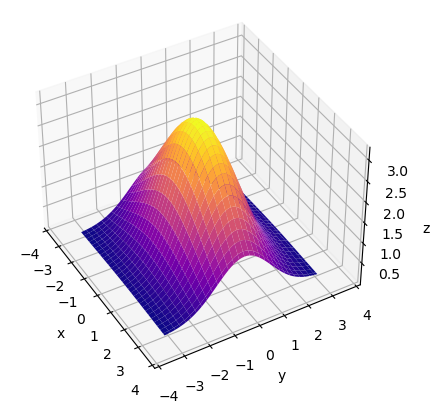

In [53]:
Z3 = Z3.astype(float).reshape(60,60)

X_ = X*1e-20
Y_ = Y*1e-20
Z3_ = Z3*1e-24

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_, Y_, Z3_, cmap='plasma')
ax.set_xlabel('x') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 10)
ax.view_init(40, -30)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

Do the fit

In [54]:
popt, pcov = curve_fit(Ne_fit, x_data, Z3_.ravel(),p0)
perr = np.sqrt(np.diag(pcov))

for i in range(len(popt)):
    print(i, popt[i],'pm',perr[i]/popt[i]*100,'%')

0 3.23338955521366 pm 0.0011636447430649853 %
1 9.521406136918081 pm 0.0033403559378303665 %
2 2.4517650853098716 pm 0.0022175233285471082 %


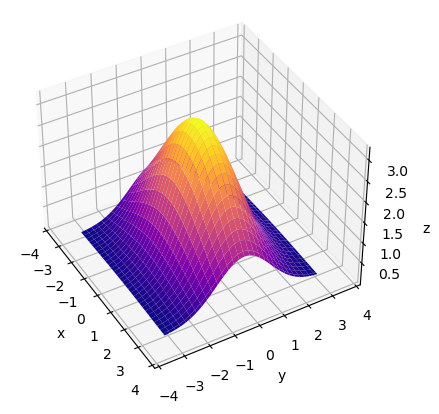

In [55]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z3fit = Ne_fit_plot(X_ , Y_, popt[0], popt[1], popt[2])
ax.plot_surface(X_, Y_, Z3fit, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 20)
ax.view_init(40, -30)
plt.show()

Comparison of analytical and numerical lens potential


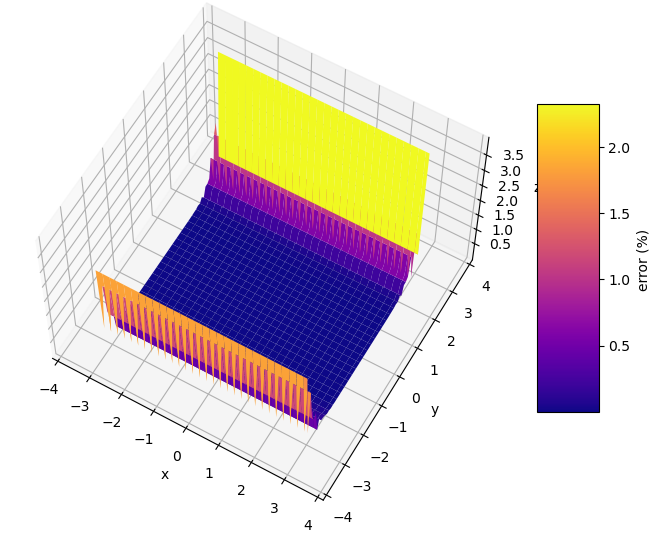

In [56]:
print('Comparison of analytical and numerical lens potential')

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
err = np.abs(Z3_ - Z3fit)/Z3_*100
surf = ax.plot_surface(X_, Y_, err,  cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5, label = 'error (%) ')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.view_init(60, -60)
plt.show()

In [57]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [58]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot3 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


In [59]:
x_image_p_gauss_canto_rot_3, y_image_p_gauss_canto_rot_3, light_p_gauss_canto_rot_3 = main(mesh_x,mesh_y,mesh_light)

time:  0.2338579575220744  minutes


In [60]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

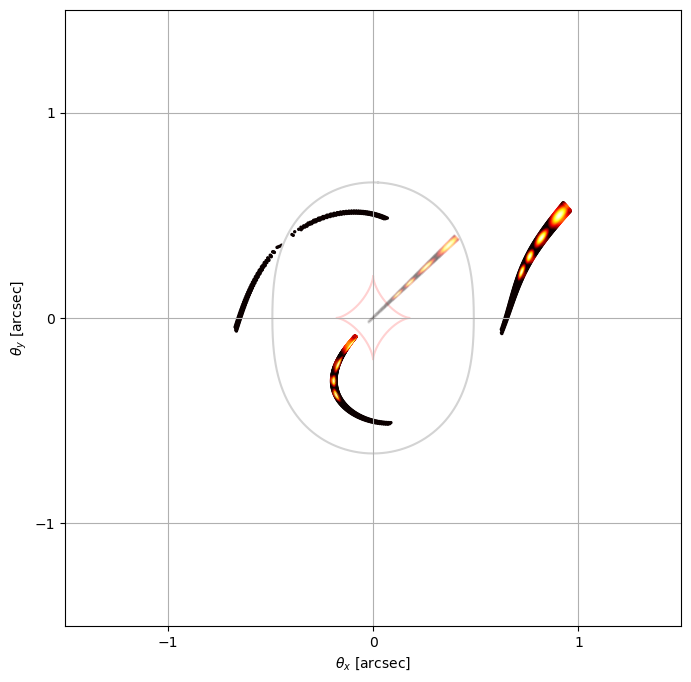

In [61]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot3[0][0],SSSpgausscantorot3[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot3[2][0],SSSpgausscantorot3[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_3, y_image_p_gauss_canto_rot_3, c=light_p_gauss_canto_rot_3, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image73.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Let's take $\alpha = 40^o$

In [62]:
alpha = 40.*np.pi/180.
time1 = time.time()
Z3 = f(X, Y)
time2 = time.time()
print('time: ',(time2-time1)/60.,'minutes')

integ_0 = 1.03164587098114e-9
integ_1 = 2.35764560527273e+18
integ_0 = 1.10534730044129e-9
integ_1 = 2.52607728920298e+18
integ_0 = 1.18154698782638e-9
integ_1 = 2.70021830322726e+18
integ_0 = 1.26004881903689e-9
integ_1 = 2.87962046298515e+18
integ_0 = 1.34062674075247e-9
integ_1 = 3.06376716328073e+18
integ_0 = 1.42302495356734e-9
integ_1 = 3.2520738194597e+18
integ_0 = 1.50695847604404e-9
integ_1 = 3.4438891564552e+18
integ_0 = 1.59211409523067e-9
integ_1 = 3.63849738102813e+18
integ_0 = 1.67815171365494e-9
integ_1 = 3.83512126008577e+18
integ_0 = 1.76470609674526e-9
integ_1 = 4.03292611410599e+18
integ_0 = 1.85138901813242e-9
integ_1 = 4.23102471984779e+18
integ_0 = 1.93779179347144e-9
integ_1 = 4.42848310095648e+18
integ_0 = 2.02348818642083e-9
integ_1 = 4.6243271690694e+18
integ_0 = 2.10803766336633e-9
integ_1 = 4.81755016191585e+18
integ_0 = 2.19098896652776e-9
integ_1 = 5.0071208090258e+18
integ_0 = 2.27188396839469e-9
integ_1 = 5.19199214036619e+18
integ_0 = 2.35026176415445e-

integ_0 = 7.62951020683616e-6
integ_1 = 7.60195413613554e+18
integ_0 = 7.87428044865013e-6
integ_1 = 7.84584032302252e+18
integ_0 = 8.10791580900327e-6
integ_1 = 8.07863184513003e+18
integ_0 = 8.32897798581293e-6
integ_1 = 8.29889559519822e+18
integ_0 = 8.53607711485246e-6
integ_1 = 8.50524672887669e+18
integ_0 = 8.72788624687203e-6
integ_1 = 8.69636308955713e+18
integ_0 = 8.90315545790959e-6
integ_1 = 8.87099926772101e+18
integ_0 = 9.06072538370537e-6
integ_1 = 9.02800008647088e+18
integ_0 = 9.19953997370496e-6
integ_1 = 9.16631330946884e+18
integ_0 = 9.31865826866629e-6
integ_1 = 9.28500137600546e+18
integ_0 = 9.41726501828003e-6
integ_1 = 9.38325198027168e+18
integ_0 = 9.49467997127956e-6
integ_1 = 9.46038732791513e+18
integ_0 = 9.55036568997837e-6
integ_1 = 9.51587192235303e+18
integ_0 = 9.58393376366415e-6
integ_1 = 9.54931875572498e+18
integ_0 = 9.59514932036371e-6
integ_1 = 9.56049380436243e+18
integ_0 = 9.58393376366415e-6
integ_1 = 9.54931875572498e+18
integ_0 = 9.550365689978

integ_1 = 1.27724348443996e+19
integ_0 = 0.0179212851087144
integ_1 = 1.27276989306739e+19
integ_0 = 0.0178167907182711
integ_1 = 1.26534870014825e+19
integ_0 = 0.017671521365304
integ_1 = 1.25503166887955e+19
integ_0 = 0.0174864855529763
integ_1 = 1.24189042316858e+19
integ_0 = 0.0172629597744916
integ_1 = 1.22601561957866e+19
integ_0 = 0.0170024738490948
integ_1 = 1.20751590589174e+19
integ_0 = 0.0167067934891576
integ_1 = 1.1865166830226e+19
integ_0 = 0.0163779003761871
integ_1 = 1.1631586900167e+19
integ_0 = 0.0160179700601171
integ_1 = 1.13759643445762e+19
integ_0 = 0.0156293480263893
integ_1 = 1.10999649275082e+19
integ_0 = 0.0152145242985904
integ_1 = 1.08053570640266e+19
integ_0 = 0.0147761069604188
integ_1 = 1.04939930155007e+19
integ_0 = 0.0143167949893306
integ_1 = 1.01677895960583e+19
integ_0 = 0.0138393507953594
integ_1 = 9.82870866965146e+18
integ_0 = 0.0133465728524705
integ_1 = 9.47873771284119e+18
integ_0 = 0.0128412687967381
integ_1 = 9.11987070911927e+18
integ_0 = 0.

integ_1 = 1.00921829237054e+19
integ_0 = 11.0967306906834
integ_1 = 9.59718680587757e+18
integ_0 = 10.5278093749565
integ_1 = 9.1051460150291e+18
integ_0 = 9.96472025421526
integ_1 = 8.61814929223322e+18
integ_0 = 9.40971221336541
integ_1 = 8.13814162193153e+18
integ_0 = 8.86485636418312
integ_1 = 7.66691423860252e+18
integ_0 = 8.33203713835442
integ_1 = 7.20609692343289e+18
integ_0 = 7.81294600220721
integ_1 = 6.75715256840203e+18
integ_0 = 7.30907772692176
integ_1 = 6.32137395051328e+18
integ_0 = 183.099589271891
integ_1 = 6.74431203375368e+18
integ_0 = 196.180339016056
integ_1 = 7.22612992455785e+18
integ_0 = 209.704487035558
integ_1 = 7.72428000013638e+18
integ_0 = 223.637226414494
integ_1 = 8.23748017841193e+18
integ_0 = 237.938436534662
integ_1 = 8.76425265176502e+18
integ_0 = 252.562717353807
integ_1 = 9.30292514964317e+18
integ_0 = 267.459489515568
integ_1 = 9.85163462602254e+18
integ_0 = 282.573163050108
integ_1 = 1.04083334733469e+19
integ_0 = 297.843376442648
integ_1 = 1.097

integ_1 = 1.75980103650143e+19
integ_0 = 186047.406584345
integ_1 = 1.82904922490881e+19
integ_0 = 192916.590105078
integ_1 = 1.89658080207517e+19
integ_0 = 199572.025553486
integ_1 = 1.96201100221516e+19
integ_0 = 205974.703003247
integ_1 = 2.0249563151428e+19
integ_0 = 212086.115248926
integ_1 = 2.08503817296752e+19
integ_0 = 217868.639317068
integ_1 = 2.14188670076496e+19
integ_0 = 223285.919267195
integ_1 = 2.1951444799289e+19
integ_0 = 228303.244883
integ_1 = 2.24447027111934e+19
integ_0 = 232887.920768561
integ_1 = 2.28954264288144e+19
integ_0 = 237009.620380314
integ_1 = 2.33006345216649e+19
integ_0 = 240640.719645083
integ_1 = 2.36576112416163e+19
integ_0 = 243756.605037649
integ_1 = 2.39639368102876e+19
integ_0 = 246335.951315477
integ_1 = 2.42175147234038e+19
integ_0 = 248360.964528567
integ_1 = 2.44165956413177e+19
integ_0 = 249817.586431394
integ_1 = 2.45597974849373e+19
integ_0 = 250695.657012308
integ_1 = 2.464612141414e+19
integ_0 = 250989.032511856
integ_1 = 2.467496343

integ_0 = 66782088.0579245
integ_1 = 2.95703067713989e+19
integ_0 = 65774393.3036678
integ_1 = 2.91241116331239e+19
integ_0 = 64630548.2103423
integ_1 = 2.86176307594013e+19
integ_0 = 63358218.9505305
integ_1 = 2.80542586394067e+19
integ_0 = 61965821.6805084
integ_1 = 2.74377218460902e+19
integ_0 = 60462429.9552951
integ_1 = 2.67720380406725e+19
integ_0 = 58857676.4784717
integ_1 = 2.6061472468644e+19
integ_0 = 57161650.6714046
integ_1 = 2.53104926046469e+19
integ_0 = 55384793.579691
integ_1 = 2.4523721618311e+19
integ_0 = 53537791.6390596
integ_1 = 2.37058913350699e+19
integ_0 = 51631470.7992442
integ_1 = 2.28617953554839e+19
integ_0 = 49676692.4537711
integ_1 = 2.19962429741989e+19
integ_0 = 47684252.5480052
integ_1 = 2.11140145062005e+19
integ_0 = 45664785.1395596
integ_1 = 2.02198185845218e+19
integ_0 = 43628671.5670845
integ_1 = 1.93182519412735e+19
integ_0 = 41585956.2486741
integ_1 = 1.8413762124189e+19
integ_0 = 39546269.9830893
integ_1 = 1.75106135353273e+19
integ_0 = 37518761

integ_1 = 1.41045360219723e+19
integ_0 = 40631698877.8427
integ_1 = 1.4432617954522e+19
integ_0 = 43534452984.5824
integ_1 = 1.54636932527626e+19
integ_0 = 46535601769.7486
integ_1 = 1.65297189183693e+19
integ_0 = 49627421217.5124
integ_1 = 1.76279513355786e+19
integ_0 = 52801008146.3643
integ_1 = 1.87552280420557e+19
integ_0 = 56046287815.8131
integ_1 = 1.99079704308382e+19
integ_0 = 59352036141.8224
integ_1 = 2.10821916413894e+19
integ_0 = 62705917133.2295
integ_1 = 2.22735098572346e+19
integ_0 = 66094535943.5358
integ_1 = 2.34771671502682e+19
integ_0 = 69503507693.6372
integ_1 = 2.46880539269912e+19
integ_0 = 72917541965.2088
integ_1 = 2.5900738941058e+19
integ_0 = 76320542596.0804
integ_1 = 2.71095047411794e+19
integ_0 = 79695722133.1488
integ_1 = 2.83083883254687e+19
integ_0 = 83025730020.7017
integ_1 = 2.94912266746868e+19
integ_0 = 86292793328.3604
integ_1 = 3.0651706739634e+19
integ_0 = 89478868559.2473
integ_1 = 3.17834193643019e+19
integ_0 = 92565802831.5579
integ_1 = 3.28799

integ_1 = 4.44708367027643e+19
integ_0 = 7746598552349.92
integ_1 = 4.53638786424283e+19
integ_0 = 7883699489746.12
integ_1 = 4.61667381482843e+19
integ_0 = 8004481487434.42
integ_1 = 4.68740343697544e+19
integ_0 = 8108125820690.01
integ_1 = 4.74809728762497e+19
integ_0 = 8193923143607.81
integ_1 = 4.7983399756691e+19
integ_0 = 8261281572388.66
integ_1 = 4.8377848955021e+19
integ_0 = 8309733484735.7
integ_1 = 4.86615820872921e+19
integ_0 = 8338940926102.84
integ_1 = 4.88326201005157e+19
integ_0 = 8348699535362.6
integ_1 = 4.88897662612709e+19
integ_0 = 8338940926102.84
integ_1 = 4.88326201005157e+19
integ_0 = 8309733484735.7
integ_1 = 4.86615820872921e+19
integ_0 = 8261281572388.66
integ_1 = 4.8377848955021e+19
integ_0 = 8193923143607.8
integ_1 = 4.79833997566909e+19
integ_0 = 8108125820690.0
integ_1 = 4.74809728762496e+19
integ_0 = 8004481487434.42
integ_1 = 4.68740343697543e+19
integ_0 = 7883699489746.11
integ_1 = 4.61667381482843e+19
integ_0 = 7746598552349.91
integ_1 = 4.5363878642

integ_1 = 4.49461407214367e+19
integ_0 = 269250191748312.0
integ_1 = 4.34472526012356e+19
integ_0 = 259662996685906.0
integ_1 = 4.19002257155388e+19
integ_0 = 249832101009588.0
integ_1 = 4.03138743559652e+19
integ_0 = 239811799270375.0
integ_1 = 3.86969597013189e+19
integ_0 = 229655571859666.0
integ_1 = 3.70581115544579e+19
integ_0 = 219415628204420.0
integ_1 = 3.54057546305017e+19
integ_0 = 209142483303764.0
integ_1 = 3.37480402251387e+19
integ_0 = 198884571998464.0
integ_1 = 3.20927839716573e+19
integ_0 = 188687904571530.0
integ_1 = 3.04474102673263e+19
integ_0 = 178595766454703.0
integ_1 = 2.88189038168713e+19
integ_0 = 168648463980038.0
integ_1 = 2.7213768605968e+19
integ_0 = 158883117285947.0
integ_1 = 2.5637994483759e+19
integ_0 = 149333500679457.0
integ_1 = 2.40970314030904e+19
integ_0 = 140029929986558.0
integ_1 = 2.25957712429279e+19
integ_0 = 130999195703903.0
integ_1 = 2.11385370214573e+19
integ_0 = 648695239304191.0
integ_1 = 2.10365161512725e+19
integ_0 = 695038434935116.0

integ_1 = 2.38974512181422e+19
integ_0 = 1.22998679567565e+16
integ_1 = 2.3509623601092e+19
integ_0 = 1.31785782546245e+16
integ_1 = 2.51891658880424e+19
integ_0 = 1.40870742022614e+16
integ_1 = 2.6925639632895e+19
integ_0 = 1.50230176159976e+16
integ_1 = 2.87145756967794e+19
integ_0 = 1.59837133597695e+16
integ_1 = 3.05508226720035e+19
integ_0 = 1.69661116477903e+16
integ_1 = 3.24285512833125e+19
integ_0 = 1.79668147695186e+16
integ_1 = 3.43412672418076e+19
integ_0 = 1.89820884222646e+16
integ_1 = 3.6281832905771e+19
integ_0 = 2.00078777708187e+16
integ_1 = 3.82424979765914e+19
integ_0 = 2.10398282811978e+16
integ_1 = 4.02149393198045e+19
integ_0 = 2.20733112981501e+16
integ_1 = 4.21903098532193e+19
integ_0 = 2.31034542548185e+16
integ_1 = 4.41592962888246e+19
integ_0 = 2.41251753194754e+16
integ_1 = 4.61121853555886e+19
integ_0 = 2.51332222001879e+16
integ_1 = 4.80389379696105e+19
integ_0 = 2.61222147454265e+16
integ_1 = 4.99292706597329e+19
integ_0 = 2.70866908988362e+16
integ_1 = 5

integ_1 = 5.22708387259967e+19
integ_0 = 2.94644433746312e+17
integ_1 = 5.43276967532573e+19
integ_0 = 3.05523202367298e+17
integ_1 = 5.63335667952437e+19
integ_0 = 3.16063456838098e+17
integ_1 = 5.82770202700336e+19
integ_0 = 3.26203416896019e+17
integ_1 = 6.01466658903924e+19
integ_0 = 3.35882098440565e+17
integ_1 = 6.19312591685949e+19
integ_0 = 3.45039917734917e+17
integ_1 = 6.36198138214651e+19
integ_0 = 3.53619297650254e+17
integ_1 = 6.52017135520833e+19
integ_0 = 3.61565267401353e+17
integ_1 = 6.66668226313878e+19
integ_0 = 3.68826047086553e+17
integ_1 = 6.80055936779481e+19
integ_0 = 3.75353608370384e+17
integ_1 = 6.92091710388278e+19
integ_0 = 3.81104202836529e+17
integ_1 = 7.02694882093762e+19
integ_0 = 3.86038849892169e+17
integ_1 = 7.11793577949459e+19
integ_0 = 3.90123776618207e+17
integ_1 = 7.19325526122033e+19
integ_0 = 3.93330802625469e+17
integ_1 = 7.25238766504247e+19
integ_0 = 3.95637663783173e+17
integ_1 = 7.29492247618217e+19
integ_0 = 3.97028269617741e+17
integ_1 

integ_0 = 2.67426685160521e+18
integ_1 = 7.52945685611843e+19
integ_0 = 2.6899512635153e+18
integ_1 = 7.57361666115798e+19
integ_0 = 2.69940603050078e+18
integ_1 = 7.60023676455532e+19
integ_0 = 2.70256499863816e+18
integ_1 = 7.60913090849088e+19
integ_0 = 2.69940603050077e+18
integ_1 = 7.60023676455532e+19
integ_0 = 2.6899512635153e+18
integ_1 = 7.57361666115798e+19
integ_0 = 2.67426685160521e+18
integ_1 = 7.52945685611843e+19
integ_0 = 2.65246219433909e+18
integ_1 = 7.4680653663166e+19
integ_0 = 2.62468866614917e+18
integ_1 = 7.38986838977979e+19
integ_0 = 2.59113786626983e+18
integ_1 = 7.29540537834615e+19
integ_0 = 2.55203941769884e+18
integ_1 = 7.18532284059202e+19
integ_0 = 2.50765835054964e+18
integ_1 = 7.06036697460287e+19
integ_0 = 2.4582921114976e+18
integ_1 = 6.92137524800386e+19
integ_0 = 2.40426724650513e+18
integ_1 = 6.76926705809966e+19
integ_0 = 2.34593580853544e+18
integ_1 = 6.60503361771413e+19
integ_0 = 2.28367154545612e+18
integ_1 = 6.42972722214916e+19
integ_0 = 2.

integ_1 = 6.17017714067623e+19
integ_0 = 9.55746837975205e+18
integ_1 = 6.00641241559922e+19
integ_0 = 9.2820631311569e+18
integ_1 = 5.83333337010767e+19
integ_0 = 8.9935322803748e+18
integ_1 = 5.65200551051543e+19
integ_0 = 8.69361111968504e+18
integ_1 = 5.46351938514311e+19
integ_0 = 8.38405759602764e+18
integ_1 = 5.26897977968365e+19
integ_0 = 8.06663541180132e+18
integ_1 = 5.06949509686087e+19
integ_0 = 7.74309764175565e+18
integ_1 = 4.86616706042869e+19
integ_0 = 7.41517107287014e+18
integ_1 = 4.66008087353304e+19
integ_0 = 7.08454145493691e+18
integ_1 = 4.45229594940751e+19
integ_0 = 6.75283982767877e+18
integ_1 = 4.24383731862003e+19
integ_0 = 6.42163006619469e+18
integ_1 = 4.03568780198022e+19
integ_0 = 6.09239776091418e+18
integ_1 = 3.8287810221218e+19
integ_0 = 5.76654052165225e+18
integ_1 = 3.62399531006417e+19
integ_0 = 5.44535976837925e+18
integ_1 = 3.42214854610339e+19
integ_0 = 5.13005404452415e+18
integ_1 = 3.22399395754258e+19
integ_0 = 4.82171386255499e+18
integ_1 = 3

integ_1 = 2.60472001067367e+19
integ_0 = 1.36748080332558e+19
integ_1 = 2.45389744552849e+19
integ_0 = 1.28528882716369e+19
integ_1 = 2.30640676057253e+19
integ_0 = 1.20521452762672e+19
integ_1 = 2.16271617375889e+19
integ_0 = 1.12748848610376e+19
integ_1 = 2.0232394554895e+19
integ_0 = 1.47443259634283e+19
integ_1 = 1.47443259643041e+19
integ_0 = 1.57976698777481e+19
integ_1 = 1.57976698786864e+19
integ_0 = 1.68867189988856e+19
integ_1 = 1.68867189998886e+19
integ_0 = 1.80086704559229e+19
integ_1 = 1.80086704569926e+19
integ_0 = 1.9160293485345e+19
integ_1 = 1.9160293486483e+19
integ_0 = 2.0337932191339e+19
integ_1 = 2.0337932192547e+19
integ_0 = 2.15375136072743e+19
integ_1 = 2.15375136085535e+19
integ_0 = 2.27545612805336e+19
integ_1 = 2.27545612818852e+19
integ_0 = 2.39842145238098e+19
integ_1 = 2.39842145252344e+19
integ_0 = 2.52212533893204e+19
integ_1 = 2.52212533908184e+19
integ_0 = 2.64601293295488e+19
integ_1 = 2.64601293311205e+19
integ_0 = 2.76950014107328e+19
integ_1 = 2.7

integ_1 = 1.16314769714212e+19
integ_0 = 4.01299191326696e+19
integ_1 = 1.220281879757e+19
integ_0 = 4.20027488584776e+19
integ_1 = 1.27723141336354e+19
integ_0 = 4.38602673407302e+19
integ_1 = 1.33371535836509e+19
integ_0 = 4.56929257605986e+19
integ_1 = 1.3894433515902e+19
integ_0 = 4.74909428468055e+19
integ_1 = 1.4441179613879e+19
integ_0 = 4.92443884227287e+19
integ_1 = 1.49743722815156e+19
integ_0 = 5.09432721121268e+19
integ_1 = 1.54909736170761e+19
integ_0 = 5.25776361401751e+19
integ_1 = 1.59879556323552e+19
integ_0 = 5.4137651057885e+19
integ_1 = 1.64623293608291e+19
integ_0 = 5.5613713127613e+19
integ_1 = 1.69111744709154e+19
integ_0 = 5.69965420378348e+19
integ_1 = 1.73316689793566e+19
integ_0 = 5.82772775688403e+19
integ_1 = 1.77211186455969e+19
integ_0 = 5.94475738091892e+19
integ_1 = 1.80769856213873e+19
integ_0 = 6.04996895268286e+19
integ_1 = 1.83969159310892e+19
integ_0 = 6.14265733292968e+19
integ_1 = 1.86787653674295e+19
integ_0 = 6.22219423043996e+19
integ_1 = 1.89

integ_0 = 7.18443449231067e+19
integ_1 = 5.62251523774368e+18
integ_0 = 7.27746062072922e+19
integ_1 = 5.69531718549633e+18
integ_0 = 7.35446813796643e+19
integ_1 = 5.75558301985678e+18
integ_0 = 7.41492579782119e+19
integ_1 = 5.80289698926321e+18
integ_0 = 7.45841388519211e+19
integ_1 = 5.8369306260324e+18
integ_0 = 7.48462906846409e+19
integ_1 = 5.85744654382171e+18
integ_0 = 7.49338792299737e+19
integ_1 = 5.86430119510028e+18
integ_0 = 7.48462906846409e+19
integ_1 = 5.85744654382171e+18
integ_0 = 7.45841388519211e+19
integ_1 = 5.8369306260324e+18
integ_0 = 7.41492579782118e+19
integ_1 = 5.80289698926321e+18
integ_0 = 7.35446813796643e+19
integ_1 = 5.75558301985677e+18
integ_0 = 7.27746062072921e+19
integ_1 = 5.69531718549633e+18
integ_0 = 7.18443449231066e+19
integ_1 = 5.62251523774367e+18
integ_0 = 7.0760264272031e+19
integ_1 = 5.5376754360009e+18
integ_0 = 6.95297127302433e+19
integ_1 = 5.44137286964115e+18
integ_0 = 6.81609375862497e+19
integ_1 = 5.33425296880016e+18
integ_0 = 6.

integ_0 = 6.85017809992892e+19
integ_1 = 1.00328000224399e+18
integ_0 = 6.6996345801852e+19
integ_1 = 9.81231334220617e+17
integ_0 = 6.53709053708779e+19
integ_1 = 9.57425064435425e+17
integ_0 = 6.36358744143884e+19
integ_1 = 9.32013727145695e+17
integ_0 = 6.1802161435563e+19
integ_1 = 9.05157088753623e+17
integ_0 = 5.98810551074537e+19
integ_1 = 8.77020483645555e+17
integ_0 = 5.78841094145644e+19
integ_1 = 8.47773131970656e+17
integ_0 = 5.58230291814636e+19
integ_1 = 8.17586463088107e+17
integ_0 = 5.37095575539183e+19
integ_1 = 7.86632467610993e+17
integ_0 = 5.1555366916306e+19
integ_1 = 7.55082099778074e+17
integ_0 = 4.93719546228424e+19
integ_1 = 7.23103750328905e+17
integ_0 = 4.71705447924893e+19
integ_1 = 6.90861808187874e+17
integ_0 = 4.4961997271687e+19
integ_1 = 6.58515327128506e+17
integ_0 = 4.27567247089995e+19
integ_1 = 6.2621681124518e+17
integ_0 = 4.05646185152321e+19
integ_1 = 5.94111130561859e+17
integ_0 = 3.83949843055472e+19
integ_1 = 5.62334575514569e+17
integ_0 = 3.6

integ_0 = 4.00500493261635e+19
integ_1 = 7.16543633004051e+16
integ_0 = 3.79967124116526e+19
integ_1 = 6.79806961832367e+16
integ_0 = 3.59644249128086e+19
integ_1 = 6.43446890066386e+16
integ_0 = 3.39613034500956e+19
integ_1 = 6.07608633824762e+16
integ_0 = 3.19948230295407e+19
integ_1 = 5.72425929970881e+16
integ_0 = 3.00717848959503e+19
integ_1 = 5.38020460968173e+16
integ_0 = 2.8198293848274e+19
integ_1 = 5.04501449024646e+16
integ_0 = 2.63797447781399e+19
integ_1 = 4.71965415251055e+16
integ_0 = 2.35096076993451e+19
integ_1 = 1.22998679567576e+16
integ_0 = 2.51891488502647e+19
integ_1 = 1.31785782546257e+16
integ_0 = 2.69256214205785e+19
integ_1 = 1.40870742022627e+16
integ_0 = 2.87145562744389e+19
integ_1 = 1.50230176159989e+16
integ_0 = 3.05508020076382e+19
integ_1 = 1.59837133597709e+16
integ_0 = 3.24285293488646e+19
integ_1 = 1.69661116477918e+16
integ_0 = 3.43412440136118e+19
integ_1 = 1.79668147695202e+16
integ_0 = 3.628180836499e+19
integ_1 = 1.89820884222663e+16
integ_0 = 3

integ_0 = 3.07288651420563e+19
integ_1 = 947570107860045.0
integ_0 = 3.24653002062417e+19
integ_1 = 1.00111565708406e+15
integ_0 = 3.42197203948081e+19
integ_1 = 1.05521580427877e+15
integ_0 = 3.59846780945176e+19
integ_1 = 1.10964089124995e+15
integ_0 = 3.77522568591416e+19
integ_1 = 1.16414680264313e+15
integ_0 = 3.95141230774212e+19
integ_1 = 1.21847655920174e+15
integ_0 = 4.12615852298059e+19
integ_1 = 1.27236214503648e+15
integ_0 = 4.29856602565511e+19
integ_1 = 1.32552655418402e+15
integ_0 = 4.46771464180657e+19
integ_1 = 1.37768603736378e+15
integ_0 = 4.63267018919238e+19
integ_1 = 1.42855252563332e+15
integ_0 = 4.79249282228547e+19
integ_1 = 1.4778362036925e+15
integ_0 = 4.94624576253994e+19
integ_1 = 1.52524820199026e+15
integ_0 = 5.09300430367424e+19
integ_1 = 1.57050337363722e+15
integ_0 = 5.23186497322152e+19
integ_1 = 1.61332311950553e+15
integ_0 = 5.36195472505568e+19
integ_1 = 1.65343822288052e+15
integ_0 = 5.48244003322513e+19
integ_1 = 1.69059165367919e+15
integ_0 = 5.

integ_0 = 5.1196435849292e+19
integ_1 = 56145694252061.5
integ_0 = 5.17381784462796e+19
integ_1 = 56739808152945.5
integ_0 = 5.21634939327744e+19
integ_1 = 57206239709542.5
integ_0 = 5.2469429641853e+19
integ_1 = 57541750814910.8
integ_0 = 5.26538516564274e+19
integ_1 = 57744001262073.3
integ_0 = 5.27154695967498e+19
integ_1 = 57811575927777.8
integ_0 = 5.26538516564274e+19
integ_1 = 57744001262073.3
integ_0 = 5.24694296418529e+19
integ_1 = 57541750814910.8
integ_0 = 5.21634939327744e+19
integ_1 = 57206239709542.5
integ_0 = 5.17381784462796e+19
integ_1 = 56739808152945.4
integ_0 = 5.1196435849292e+19
integ_1 = 56145694252061.4
integ_0 = 5.05420034223652e+19
integ_1 = 55427996577578.2
integ_0 = 4.97793601268431e+19
integ_1 = 54591627080689.5
integ_0 = 4.89136755652677e+19
integ_1 = 53642255119406.4
integ_0 = 4.79507516484832e+19
integ_1 = 52586243486508.2
integ_0 = 4.68969578898079e+19
integ_1 = 51430577448476.1
integ_0 = 4.57591613349146e+19
integ_1 = 50182787901560.4
integ_0 = 4.45446

integ_0 = 3.08691901636103e+19
integ_1 = 721847165544.451
integ_0 = 2.95618545102358e+19
integ_1 = 691276342960.447
integ_0 = 2.82437426870471e+19
integ_1 = 660453529715.382
integ_0 = 2.69213571143542e+19
integ_1 = 629530778831.863
integ_0 = 2.56009324491451e+19
integ_1 = 598653881937.44
integ_0 = 2.42883912531124e+19
integ_1 = 567961332602.815
integ_0 = 2.29893053381007e+19
integ_1 = 537583422441.265
integ_0 = 2.1708863038599e+19
integ_1 = 507641475806.459
integ_0 = 2.04518425540748e+19
integ_1 = 478247226427.842
integ_0 = 1.9222591399994e+19
integ_1 = 449502336891.949
integ_0 = 1.8025011907269e+19
integ_1 = 421498059560.541
integ_0 = 1.68625526173738e+19
integ_1 = 394315035353.419
integ_0 = 1.44338223481409e+19
integ_1 = 40631698877.8482
integ_0 = 1.54649836890187e+19
integ_1 = 43534452984.5883
integ_0 = 1.65310983138504e+19
integ_1 = 46535601769.7549
integ_0 = 1.76294223779197e+19
integ_1 = 49627421217.5191
integ_0 = 1.87567931549858e+19
integ_1 = 52801008146.3714
integ_0 = 1.990963

integ_0 = 2.14160871445743e+19
integ_1 = 592833389.68131
integ_0 = 2.24155580002781e+19
integ_1 = 620500427.608203
integ_0 = 2.34068577224894e+19
integ_1 = 647941274.787308
integ_0 = 2.43848904041997e+19
integ_1 = 675014867.923311
integ_0 = 2.5344436085773e+19
integ_1 = 701576709.735077
integ_0 = 2.6280195341432e+19
integ_1 = 727480103.18473
integ_0 = 2.71868366187383e+19
integ_1 = 752577461.914272
integ_0 = 2.80590457636141e+19
integ_1 = 776721681.181644
integ_0 = 2.88915771054805e+19
integ_1 = 799767551.983475
integ_0 = 2.96793054288691e+19
integ_1 = 821573199.716876
integ_0 = 3.04172781207511e+19
integ_1 = 842001527.705423
integ_0 = 3.11007667580068e+19
integ_1 = 860921645.227244
integ_0 = 3.17253173878105e+19
integ_1 = 878210259.360846
integ_0 = 3.22867987558802e+19
integ_1 = 893753010.024336
integ_0 = 3.27814477538243e+19
integ_1 = 907445728.03459
integ_0 = 3.32059113872192e+19
integ_1 = 919195596.854378
integ_0 = 3.35572846102147e+19
integ_1 = 928922199.918022
integ_0 = 3.3833143

integ_0 = 2.7180285384591e+19
integ_1 = 4392379.20600202
integ_0 = 2.68956847505273e+19
integ_1 = 4346387.27142929
integ_0 = 2.65518833129241e+19
integ_1 = 4290828.38879967
integ_0 = 2.61512340623816e+19
integ_1 = 4226082.80529742
integ_0 = 2.56964528129589e+19
integ_1 = 4152589.40097958
integ_0 = 2.51905875574006e+19
integ_1 = 4070840.73652983
integ_0 = 2.46369844743884e+19
integ_1 = 3981377.55997393
integ_0 = 2.40392511177006e+19
integ_1 = 3884782.85798683
integ_0 = 2.34012173529332e+19
integ_1 = 3781675.54320196
integ_0 = 2.2726894632058e+19
integ_1 = 3672703.87291235
integ_0 = 2.20204342092871e+19
integ_1 = 3558538.69668498
integ_0 = 2.12860849034695e+19
integ_1 = 3439866.63069394
integ_0 = 2.05281510028123e+19
integ_1 = 3317383.25505367
integ_0 = 1.97509508876165e+19
integ_1 = 3191786.42718432
integ_0 = 1.89587769166556e+19
integ_1 = 3063769.79938403
integ_0 = 1.81558570837688e+19
integ_1 = 2934016.62247081
integ_0 = 1.73463189042898e+19
integ_1 = 2803193.90976948
integ_0 = 1.6534

integ_0 = 8.73555866947941e+18
integ_1 = 4910.50277978107
integ_0 = 8.17218975854595e+18
integ_1 = 4593.81729830793
integ_0 = 6.71359522286546e+18
integ_1 = 183.099589271928
integ_0 = 7.19321868539284e+18
integ_1 = 196.180339016096
integ_0 = 7.68909994814229e+18
integ_1 = 209.7044870356
integ_0 = 8.19996276824921e+18
integ_1 = 223.637226414539
integ_0 = 8.72433606873424e+18
integ_1 = 237.93843653471
integ_0 = 9.26055519536189e+18
integ_1 = 252.562717353858
integ_0 = 9.80676558730771e+18
integ_1 = 267.459489515623
integ_0 = 1.0360928962796e+19
integ_1 = 282.573163050166
integ_0 = 1.09208320848727e+19
integ_1 = 297.843376442709
integ_0 = 1.14840981330183e+19
integ_1 = 313.205306771041
integ_0 = 1.20482006640306e+19
integ_1 = 328.59005046006
integ_0 = 1.2610480101263e+19
integ_1 = 343.925072992049
integ_0 = 1.3168162645734e+19
integ_1 = 359.134724668545
integ_0 = 1.37183814567464e+19
integ_1 = 374.140818268429
integ_0 = 1.42581999044327e+19
integ_1 = 388.863263213597
integ_0 = 1.478463665

integ_1 = 0.57778631068401
integ_0 = 1.37772303817992e+19
integ_1 = 0.589389137297176
integ_0 = 1.40210627150876e+19
integ_1 = 0.599820270738325
integ_0 = 1.42358720145344e+19
integ_1 = 0.60900980043158
integ_0 = 1.4420202188272e+19
integ_1 = 0.616895434849116
integ_0 = 1.45727916733204e+19
integ_1 = 0.623423204397932
integ_0 = 1.46925878116124e+19
integ_1 = 0.628548076425384
integ_0 = 1.47787589426363e+19
integ_1 = 0.632234472541775
integ_0 = 1.48307040183826e+19
integ_1 = 0.63445667994722
integ_0 = 1.4848059585096e+19
integ_1 = 0.635199150110603
integ_0 = 1.48307040183826e+19
integ_1 = 0.634456679947219
integ_0 = 1.47787589426363e+19
integ_1 = 0.632234472541775
integ_0 = 1.46925878116124e+19
integ_1 = 0.628548076425384
integ_0 = 1.45727916733204e+19
integ_1 = 0.623423204397932
integ_0 = 1.4420202188272e+19
integ_1 = 0.616895434849116
integ_0 = 1.42358720145344e+19
integ_1 = 0.609009800431579
integ_0 = 1.40210627150876e+19
integ_1 = 0.599820270738325
integ_0 = 1.37772303817992e+19
int

integ_0 = 1.02490945264864e+19
integ_1 = 0.000413003939297593
integ_0 = 1.00473289030511e+19
integ_1 = 0.000404873465227101
integ_0 = 9.82652292764092e+18
integ_1 = 0.000395975729194989
integ_0 = 9.58811548211065e+18
integ_1 = 0.000386368713286664
integ_0 = 9.3336341179399e+18
integ_1 = 0.000376113972674337
integ_0 = 9.06467881278887e+18
integ_1 = 0.000365275981061
integ_0 = 8.78290530479137e+18
integ_1 = 0.000353921459108653
integ_0 = 8.49000824598062e+18
integ_1 = 0.000342118695578186
integ_0 = 8.18770441248239e+18
integ_1 = 0.000329936870756795
integ_0 = 7.87771620108925e+18
integ_1 = 0.000317445391425589
integ_0 = 7.56175562984237e+18
integ_1 = 0.000304713246137003
integ_0 = 7.24150904466787e+18
integ_1 = 0.000291808388943827
integ_0 = 6.91862271538838e+18
integ_1 = 0.000278797158967057
integ_0 = 6.59468948305755e+18
integ_1 = 0.000265743742328514
integ_0 = 6.27123659708915e+18
integ_1 = 0.000252709682028172
integ_0 = 5.94971485564093e+18
integ_1 = 0.000239753440338257
integ_0 = 5.

integ_1 = 8.68308383598119e-8
integ_0 = 3.59691681774318e+18
integ_1 = 8.18030235768532e-8
integ_0 = 3.38072533584355e+18
integ_1 = 7.68862802138396e-8
integ_0 = 3.17010402841965e+18
integ_1 = 7.20962167650565e-8
integ_0 = 2.96565939910518e+18
integ_1 = 6.744662666348e-8
time:  6.111498900254568 minutes


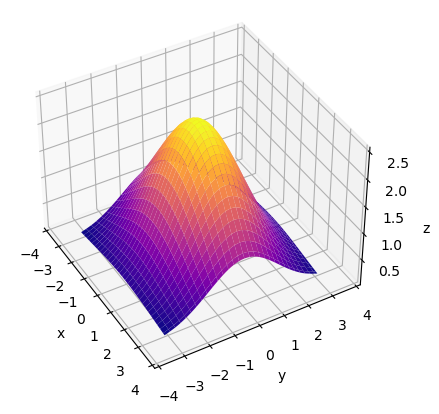

In [63]:
Z3 = Z3.astype(float).reshape(60,60)

X_ = X*1e-20
Y_ = Y*1e-20
Z3_ = Z3*1e-24

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_, Y_, Z3_, cmap='plasma')
ax.set_xlabel('x') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 10)
ax.view_init(40, -30)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

Do the fit

In [64]:
popt, pcov = curve_fit(Ne_fit, x_data, Z3_.ravel(),p0)
perr = np.sqrt(np.diag(pcov))

for i in range(len(popt)):
    print(i, popt[i],'pm',perr[i]/popt[i]*100,'%')

0 2.5347102205369385 pm 0.0018597706040785185 %
1 9.521406136917358 pm 0.005303490179907614 %
2 3.989359138964176 pm 0.0036810230354390565 %


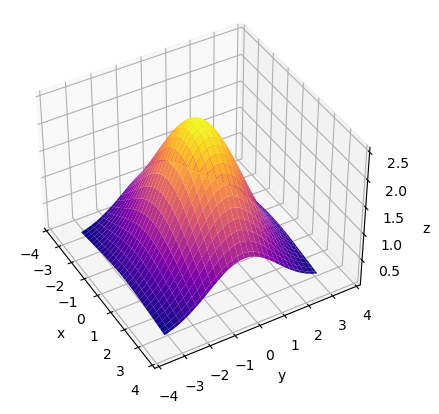

In [65]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z3fit = Ne_fit_plot(X_ , Y_, popt[0], popt[1], popt[2])
ax.plot_surface(X_, Y_, Z3fit, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 20)
ax.view_init(40, -30)
plt.show()

Comparison of analytical and numerical lens potential


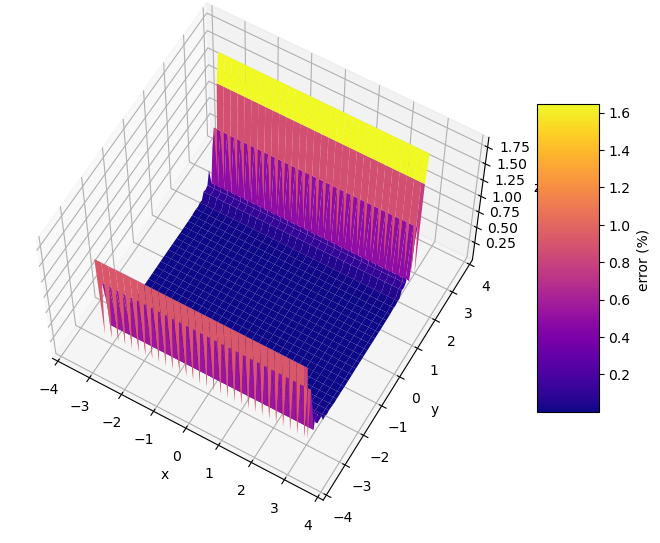

In [66]:
print('Comparison of analytical and numerical lens potential')

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
err = np.abs(Z3_ - Z3fit)/Z3_*100
surf = ax.plot_surface(X_, Y_, err,  cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5, label = 'error (%) ')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.view_init(60, -60)
plt.show()

In [67]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [68]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot3 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


In [69]:
x_image_p_gauss_canto_rot_3, y_image_p_gauss_canto_rot_3, light_p_gauss_canto_rot_3 = main(mesh_x,mesh_y,mesh_light)

time:  0.23214126427968343  minutes


In [70]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

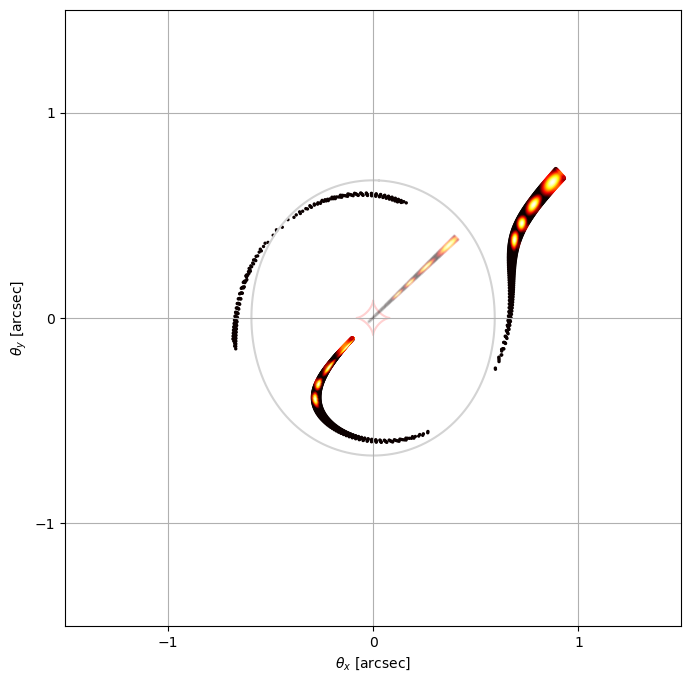

In [71]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot3[0][0],SSSpgausscantorot3[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot3[2][0],SSSpgausscantorot3[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_3, y_image_p_gauss_canto_rot_3, c=light_p_gauss_canto_rot_3, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image74.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [72]:
end_total = time.time()
print('total time: ',(end_total-start_total)/60.,' minutes')


total time:  25.285361166795095  minutes


Podria haber aproximado los límites y haber hecho
$$
\int_{-\infty}^{\infty}\mathrm{e}^{-ax^2+bx+c} = \dfrac{\sqrt{{\pi}}\mathrm{e}^\frac{4ac+b^2}{4a}}{\sqrt{a}}
$$